# File to explore time dependant data and create (preliminary plots)

## Create run scripts and test data

- Extract snapshot times-function is in archive-folders

- Some boxes on creating spherically symmetric distribution outside the box.
  These can be modidified to be dependent on snapshot-specific data, ie
  gas-to-dust-ratio and average dust density at 14-15au.

In [2]:
# Create run-files
import create_r3d_functions as c3d

outpaths = [
    #'../r3dsims/st28gm06n052/',
    '../r3dsims/st28gm06n074/',
    '../r3dsims/st28gm06n075/',
]
phaseslist = [
    #[phase for phase in range(396,400+1)],
    [phase for phase in range(230,235+1)],
    [phase for phase in range(222,232+1)],
]
for outpath,phases in zip(outpaths,phaseslist):
    c3d.write_r3d_runscripts(
        path = outpath,
        phase_list = phases,
        sed_angles_list = [
            [0,0],
            [90,0],
            [180,0],
            [270,0],
            [90,90],
            [90,270],
        ],
        image_wavelength_list = [1,2,10],
        image_angles_list = [
            [0,0],
            [90,0],
            [180,0],
            [270,0],
            [90,90],
            [90,270],
        ],
        image_sizeau = 30,
        image_npix = 512,
        Nscripts = 1
    )


Finished writing 6 run-r3d-scripts

Finished writing 11 run-r3d-scripts



In [23]:
# Extract dust masses from r3d-log output

#modelname = 'st28gm06n052'
#phases = [
#    phase for phase in range(256,265+1)
#]
phases = [256]
# Loop through phases
for phase in phases:
    totalmass = 0
    # Load beginning of log-file
    with open(f'r3dout_{phase}_1.txt', 'r') as flog:
        # Loop through beginning of log file, dust mass always starts at
        # line 38
        for nline,line in enumerate(flog.readlines()):
            if nline >= 38 and nline <= 50:
                # Extract lines with dust masses
                if line.split()[:4] == ['Dust', 'mass', 'in', 'species']:
                    # Dust mass is 6th element of split

                    masses = float(line.split()[6])

                    totalmass += masses

            if nline > 50:
                break
    # Output total mass and phase number
    print(f'    {phase}      {totalmass}')


    256      1.2982539038591769e-08


In [1]:
# Create spherical dust density distribution outside the co5bold-box
# very approximative, just to test effect on SED by using results from
# inner box SED as emitting point source star
import create_r3d_functions as c3d
import os

AUcm = 1.49598e13 # cm
inradius = 15
outradius=1000
outputpath='../r3dresults/st28gm06n052_largesphere/'

# Create grid
c3d.create_grid(
    gridedge=outradius, 
    nxyz=10, 
    refinementlist=[800,600,400,200], 
    inrefine=14, 
    savegrid=True
)
os.system(f'mv ../amr_grid.inp {outputpath}')
os.system(f'mv ../grid_distances.csv {outputpath}')
os.system(f'mv ../grid_cellsizes.csv {outputpath}')
os.system(f'mv ../grid_info.txt {outputpath}')




Creating amr_grid with octree refinement.
  Final length of total side of whole grid: 1000 AU
  Number of base cells along one side of the grid: 10
  Distances to outer refinement limits from centrum:
    [800, 600, 400, 200] AU
  Distances to inner refinement limits from centrum:
    [3.5, 7.0, 10.5, 14.0] AU
  Number refinements: 4

  Size of base cell: 100.0 AU
  Child cell size 1: 50.0 AU
  Child cell size 2: 25.0 AU
  Child cell size 3: 12.5 AU
  Child cell size 4: 6.25 AU
  Writing amr_grid.inp
  Writing grid_distances.csv and grid_cellsizes.csv
(Not necessary for Radmc3d, but useful for pre/postprocessing of your model. They have the same order as dust_densities.inp)
  Writing grid_info.txt
Create grid:
    amr_grid.inp
    grid_info.txt
    grid_distances.csv
    grid_cellsizes.csv
DONE



0

In [1]:
# Create spherical dust density distribution outside the co5bold-box
# very approximative, just to test effect on SED by using results from
# inner box SED as emitting point source star
# Create density

import create_r3d_functions as c3d
import os

AUcm = 1.49598e13 # cm
inradius = 15
outradius=1000
outputpath='../r3dresults/st28gm06n052_largesphere/'

c3d.create_spheredensity(
    optconstlist=['mg2sio4'],
    agrainlist=[0.95],
    totaldustmass=2.5e-6*1.989e33,
    densitypower=-2,
    inradius=inradius,
    outradius=outradius,
    outputpath=outputpath
)


Running create_spheredensity():
  Loading grid distances
  Loading grid cell sizes
  Writing dust_density.inp
  Finished dust_density.inp, moved to outputpath
  Total dust mass is 3.663759664314922e+27 g (1.8420108920638119e-06 Msol)
create_spheredensity: Done


/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:1096: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


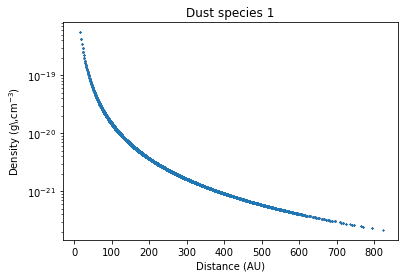

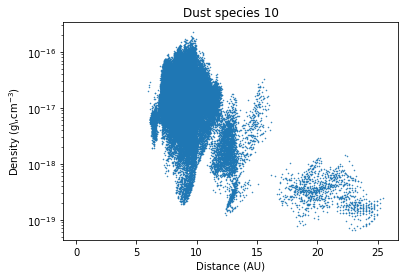

In [1]:
# plot to check densities
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt

outputpath='../r3dresults/st28gm06n052_largesphere/'

a3d.plot_onedensity_radius(
    density_path=outputpath+'dust_density.inp',
    grid_path=outputpath+'grid_distances.csv',
    amr_path=outputpath+'amr_grid.inp',
    numb_specie=1
)
plt.yscale('log')


# Plot to compare numbers with inner densities
# Only plot last (largest grain size) species
a3d.plot_onedensity_radius(
    density_path=outputpath+'innerdata/dust_density_dust.inp',
    grid_path=outputpath+'innerdata/grid_distances.csv',
    amr_path=outputpath+'innerdata/amr_grid.inp',
    numb_specie=10
)
plt.yscale('log')


In [3]:
# Extract spectrum adn write stars.inp
import analyze_r3d_functions as a3d

#model = '199_i090_phi270'
model = '225_i090_phi090'

wavelengths, spectrum = a3d.load_spectrum(
    path=f'../r3dresults/st28gm06n052_largesphere/{model}/spectrum_i090_phi090.out'
)
with open(f'../r3dresults/st28gm06n052_largesphere/{model}/stars_fix.inp', 'w') as f:
    for wavelength in wavelengths:
        f.write(f'{wavelength}\n')
    for flux in spectrum:
        f.write(f'{flux/1e23}\n')

# and write wavelength-file
with open(f'../r3dresults/st28gm06n052_largesphere/{model}/wavelength_micron.inp', 'w') as fwave:
    fwave.write(f'{int(len(wavelengths))}\n')
    for wavelength in wavelengths:
        fwave.write(f'{wavelength}\n')





## Remove spikes in SEDs and images

Doing folder: ../r3dresults/st28gm06n052_timedep


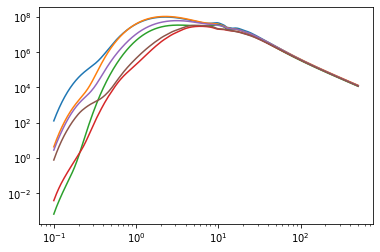

In [2]:
# Remove spikes from SED
# Merge SEDs with different seeds
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
import os

folders = [
    '../r3dresults/st28gm06n052_timedep',
    #'../r3dresults/st28gm06n074',
    #'../r3dresults/st28gm06n075',
]
phaseslist = [
    [150]
    #[phase for phase in range(395,400+1)],
    #[phase for phase in range(230,246+1)],
    #[phase for phase in range(222,253+1)],
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
for folder,phases in zip(folders,phaseslist):
    print(f'Doing folder: {folder}')
    for phase in phases:
        for angle in angles:
            a,b = a3d.remove_sedspikes(
                paths = [
                            f'{folder}_1/{phase}/spectrum_{angle}.out',
                            f'{folder}_2/{phase}/spectrum_{angle}.out',
                            f'{folder}_3/{phase}/spectrum_{angle}.out',
                        ],
                save=True
            )
            if os.path.exists(f'{folder}_nospikes/{phase}') == False:
                os.system(f'mkdir {folder}_nospikes/{phase}')
            os.system(f'mv ../spectrum.out {folder}_nospikes/{phase}/spectrum_{angle}.out')

            plt.figure(num=folder)
            plt.plot(a,b)
            plt.xscale('log')
            plt.yscale('log')



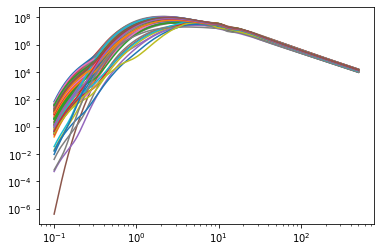

In [2]:
# Extra remove spikes from SED, for those who need an extra seed
# Merge SEDs with different seeds
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
import os

folder = '../r3dresults/st28gm06n052_timedep'
#folder = '../r3dresults/st28gm06n074'
#folder = '../r3dresults/st28gm06n075'

phases = [
    182,
    217,
    225,
    251,
    260,
    263,
    296,
    297,
    299,
    364,
    391,
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
for phase in phases:
    for angle in angles:
        a,b = a3d.remove_sedspikes(
                paths = [
                            f'{folder}_1/{phase}/spectrum_{angle}.out',
                            f'{folder}_2/{phase}/spectrum_{angle}.out',
                            f'{folder}_3/{phase}/spectrum_{angle}.out',
                            f'{folder}_4/{phase}/spectrum_{angle}.out',
                        ],
                save=True
            )
        if os.path.exists(f'{folder}_nospikes/{phase}') == False:
            os.system(f'mkdir {folder}_nospikes/{phase}')
        os.system(f'mv ../spectrum.out {folder}_nospikes/{phase}/spectrum_{angle}.out')

        plt.plot(a,b)
        plt.xscale('log')
        plt.yscale('log')
plt.show()


In [3]:
# Remove spikes from Images
import analyze_r3d_functions as a3d
import os

folders = [
    '../r3dresults/st28gm06n052_timedep',
    #'../r3dresults/st28gm06n074',
    #'../r3dresults/st28gm06n075',
]
phaseslist = [
    [
        150,
    ]
    #[phase for phase in range(180,259+1)],
    #[phase for phase in range(230,268+1)],
    #[phase for phase in range(346,442+1)],
]
images = [
    'image_i000_phi000_01um.out',
    'image_i000_phi000_02um.out',
    'image_i000_phi000_10um.out',
    'image_i090_phi000_01um.out',
    'image_i090_phi000_02um.out',
    'image_i090_phi000_10um.out',
    'image_i090_phi090_01um.out',
    'image_i090_phi090_02um.out',
    'image_i090_phi090_10um.out',
    'image_i090_phi270_01um.out',
    'image_i090_phi270_02um.out',
    'image_i090_phi270_10um.out',
    'image_i180_phi000_01um.out',
    'image_i180_phi000_02um.out',
    'image_i180_phi000_10um.out',
    'image_i270_phi000_01um.out',
    'image_i270_phi000_02um.out',
    'image_i270_phi000_10um.out'
]
for folder,phases in zip(folders,phaseslist):
    print(f'Doing folder: {folder}')
    for phase in phases:
        print(f'  Doing phase {phase}')
        for image in images:

            image1d = a3d.remove_imagespikes(
                folders = [
                    f'{folder}_1/{phase}/',
                    f'{folder}_2/{phase}/',
                    f'{folder}_3/{phase}/',
                    #f'{folder}_4/{phase}/',
                ],
                imagefilename = image
            )
            if os.path.exists(f'{folder}_nospikes/{phase}') == False:
                os.system(f'mkdir {folder}_nospikes/{phase}')
            os.system(f'mv ../{image} {folder}_nospikes/{phase}/')


Doing folder: ../r3dresults/st28gm06n052_timedep
  Doing phase 150


In [1]:
# SPECIAL: for 075, snapshots 255, 259 and 345, interpolate images and SEDs
# between previous and next snapshots
import analyze_r3d_functions as a3d

# Define stuff
modelname = 'st28gm06n075'
phases = [
    255,
    259,
    345
]
imagewaves = [
    '01','02','10'
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Loop through each phase and interpolate images and SEDs
for phase in phases:
    prev_phase = phase-1
    next_phase = phase+1
    # Loop through angles
    for angle in angles:
        # Load SEDs
        wavelengths, prev_sed = a3d.load_spectrum(
            path=f'../r3dresults/{modelname}_nospikes/{prev_phase}/spectrum_{angle}.out'
        )
        wavelengths, next_sed = a3d.load_spectrum(
            path=f'../r3dresults/{modelname}_nospikes/{next_phase}/spectrum_{angle}.out'
        )
        #
        # Wave average flux density in new files
        with open(f'../r3dresults/{modelname}_nospikes/{phase}/spectrum_{angle}.out', 'w') as fsed:
            # Write header
            fsed.write(
                f'           1\n        {int(len(wavelengths))}\n\n'
            )
            # Write wavelength and flux densities, changed back to r3d-fluxformat
            for nwavelength,wavelength in enumerate(wavelengths):
                fsed.write(f'  {wavelength}   {0.5*(prev_sed[nwavelength]+next_sed[nwavelength])/1e23}\n')
        #
        #
        # And load images
        for imagewave in imagewaves:
            #
            # Reset lists
            imageheader = []
            prev_image = []
            next_image = []
            #
            with open(f'../r3dresults/{modelname}_nospikes/{prev_phase}/image_{angle}_{imagewave}um.out', 'r') as fprev_image:
                for nline,line in enumerate(fprev_image.readlines()):
                    # First save header
                    if nline < 6:
                        imageheader.append(line)
                    if nline >= 6:
                    # Then prev flux densities
                        prev_image.append(float(line))
            #
            # And next image flux densities
            with open(f'../r3dresults/{modelname}_nospikes/{next_phase}/image_{angle}_{imagewave}um.out', 'r') as fnext_image:
                for nline,line in enumerate(fnext_image.readlines()):
                    if nline >= 6:
                        next_image.append(float(line))
            #
            # And save number of pixels
            Npixels = len(next_image)
            #
            # Write new image-files
            with open(f'../r3dresults/{modelname}_nospikes/{phase}/image_{angle}_{imagewave}um.out', 'w') as fimage:
                #
                # Write header
                for line in imageheader:
                    fimage.write(f'{line}')
                #
                # Write image fluxes
                for npixel in range(Npixels):
                    fimage.write(f'{0.5*(prev_image[npixel]+next_image[npixel])}\n')






## Plot Images

In [2]:
%%capture
# plot time-series images in one direction, one wavelength
# saves pngs in folder r3dplots, timestamped to today

import os
import numpy as np
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from datetime import date



path = '../r3dresults/st28gm06n052_timedep_nospikes/'
modelabbreviation = '052'
#path = '../r3dresults/st28gm06n074_nospikes/'
#modelabbreviation = '074'

wavelength = '02'
imagefilename = f'image_i000_phi000_{wavelength}um.out'

# Create outputfolder
outputfolder = f'../r3dplots/{str(date.today())}_{modelabbreviation}_image-1dir-{wavelength}um/'
if os.path.exists(outputfolder) == False:
    os.system(f'mkdir {outputfolder}')

# Extract list of folders from the path folder, and make them to numbers, and sort them!
snapshot_folders = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
snapshot_folders.sort()

# Load snapshot times ([:,1] is years, [:,0] is snapshot number)
snapshot_times = np.loadtxt(path+'snapshot_yr.dat')


# Load one image at a time and save as png's for animationcreations
for snapshot in snapshot_folders:

    # Create plot objects with image
    fig, ax, fluxtotal = a3d.plot_images(
        path = f'{path}/{snapshot}/',
        images = [imagefilename]
    )
    for snaptime in snapshot_times:
        if snapshot == snaptime[0]:
            ax.text(
                x=16,y=14,
                s=f'{snaptime[1]:.3f} yrs',
                backgroundcolor='white',
                fontsize=15
            )




    # Save as PNG's
    fig.tight_layout()
    fig.savefig(f'{outputfolder}{snapshot}_{imagefilename[:-4]}.png', facecolor='white')



In [6]:
%%capture
# plot time-series images in all directions
# ie 6 subplots in same fig
# capture stops image output
import os
import numpy as np
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from datetime import date


# Set some path settings
path = '../r3dresults/st28gm06n052_timedep_nospikes/'
modelabbreviation = '052'
#path = '../r3dresults/st28gm06n074_nospikes/'
#modelabbreviation = '074'
#path = '../r3dresults/st28gm06n075_nospikes/'
#modelabbreviation = '075'

#path = '../r3dresults/st28gm06n052_timedep_nodust/'
#modelabbreviation = '052nodust'



# Extract list of folders from the path folder, and make them to numbers, and sort them!
#snapshot_folders = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
#snapshot_folders.sort()
# Or chose manually:
snapshot_folders = [
    150,
]



# Chose wavelength
#wavelength = '01'
#wavelength = '02'
wavelength = '10'

# Resulting list of image files
imagefilenames = [
    f'image_i000_phi000_{wavelength}um.out',
    f'image_i090_phi000_{wavelength}um.out',
    f'image_i090_phi090_{wavelength}um.out',
    f'image_i090_phi270_{wavelength}um.out',
    f'image_i180_phi000_{wavelength}um.out',
    f'image_i270_phi000_{wavelength}um.out'
]
# Create outputfolder
outputfolder = f'../r3dplots/{str(date.today())}_{modelabbreviation}_image-6direct-{wavelength}um/'
if os.path.exists(outputfolder) == False:
    os.system(f'mkdir {outputfolder}')


# Load snapshot times ([:,1] is years, [:,0] is snapshot number)
snapshot_times = np.loadtxt(path+'snapshot_yr.dat')

# Load all 6 LOSs at a time and save as png's for animation creation
for snapshot in snapshot_folders:
    # Create list with image paths
    imagepaths = []
    for imagefilename in imagefilenames:
        imagepaths.append(f'{path}{snapshot}/{imagefilename}')

    # Create plot objects with image
    fig, ax = a3d.plot_imagesubplots(
        imagelist = imagepaths
    )
    for snaptime in snapshot_times:
        if snapshot == snaptime[0]:
            ax[0][-1].text(
                x=0,y=18,
                s=f'{snaptime[1]:.3f} yrs',
                backgroundcolor='white',
                fontsize=15
            )

    # Save as PNG's
    fig.tight_layout()
    fig.savefig(f'{outputfolder}{snapshot}_{wavelength}um.png', facecolor='white')

os.system('spd-say moo')



## Plot SEDs

In [4]:
%%capture
# Plot all SEDs in the same figure, highlight one snapshot
# Save SEDs as pngs in todaysdate-'_seds/'
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
from matplotlib import rc

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

# Set path settings
path = '../r3dresults/st28gm06n052_timedep_nospikes/'
modelabbreviation = '052'
#path = '../r3dresults/st28gm06n074_nospikes/'
#modelabbreviation = '074'
#path = '../r3dresults/st28gm06n075_nospikes/'
#modelabbreviation = '075'

# Create outputfolder
outputfolder = f'../r3dplots/{str(date.today())}_{modelabbreviation}_seds/'
if os.path.exists(outputfolder) == False:
    os.system(f'mkdir {outputfolder}')

# Extract list of folders from the path folder, and make them to numbers, and sort them!
#phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
#phases.sort()
#phases=[nphase for nphase in range(411,443)]
phases = [
    182,
    217,
    225,
    251,
    260,
    263,
    296,
    297,
    299,
    364,
    391,
]

# Load snapshot times ([:,1] is years, [:,0] is snapshot number)
snapshot_times = np.loadtxt(path+'snapshot_yr.dat')

# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Load min-max SEDs
average_SED = np.loadtxt(path+'average_sed.dat')
wavelength = average_SED[:,0]
maxSED = average_SED[:,3]
minSED = average_SED[:,4]
# Set plot colours
if modelabbreviation == '052':
    linecolour = 'darkblue'
    allcolour = 'deepskyblue'
if modelabbreviation == '074':
    linecolour = 'darkred'
    allcolour = 'salmon' #lr tomato
if modelabbreviation == '075':
    linecolour = 'darkgreen'
    allcolour = 'lawngreen'


# Loop over high lighted snapshots
for hilitsnapshot in phases:
    
    # Set settings for each highlighted snapshotplot
    fig, ax = plt.figure(
        hilitsnapshot, 
        figsize=(6, 4)
    ), plt.axes()
    ax.set(
        xscale='log',
        yscale='log',
        xlim=[0.5,40],
        ylim=[1e5,2e8]
    )
    ax.set_ylabel(r'$F_\nu$, Jy at 1 pc', fontsize=18)
    ax.set_xlabel(r'Wavelength ($\mu$m)',fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=15)

    # Plot min-max range of all SEDs
    ax.fill_between(
        wavelength,
        minSED,
        maxSED,
        color=allcolour
    )
    # Load and plot hilite-snapshot
    for angle in angles:
        wavelength, fluxes = a3d.load_spectrum(
            path=f'{path}{hilitsnapshot}/spectrum_{angle}.out'
        )
        ax.plot(
            wavelength,
            fluxes,
            color=linecolour
        )
    # Add textbox with snapshot numer
    for snaptime in snapshot_times:
        if hilitsnapshot == snaptime[0]:
            ax.text(
                x=15,y=8e7,
                s=f'{snaptime[1]:.3f} yrs',
                backgroundcolor='white',
                fontsize=15
            )
    # Save each in a separate file, for talks and suchs
    fig.tight_layout()
    fig.savefig(
        f'../r3dplots/{outputfolder}/seds_{hilitsnapshot}.png', 
        dpi=300, 
        facecolor='white'
    )

os.system('spd-say moo')







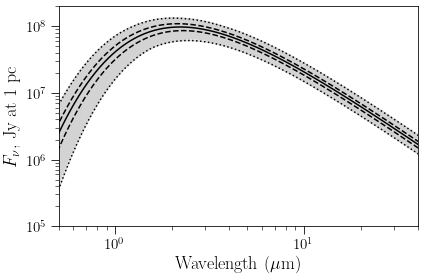

In [6]:
import analyze_timedep_functions as atf
from matplotlib import rc
import os

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

# Path settings
# With dust
#path = '../r3dresults/st28gm06n052_timedep_nospikes/'
#modelabbreviation = '052'
#path = '../r3dresults/st28gm06n074_nospikes/'
#modelabbreviation = '074'
#path = '../r3dresults/st28gm06n075_nospikes/'
#modelabbreviation = '075'

# Without dust
path = '../r3dresults/st28gm06n052_timedep_nodust/'
modelabbreviation = '052_nodust'
#path = '../r3dresults/st28gm06n074_nodust/'
#modelabbreviation = '074_nodust'
#path = '../r3dresults/st28gm06n075_nodust/'
#modelabbreviation = '075_nodust'

# Extract list of folders from the path folder, and make them to numbers, and sort them!
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()

fig,ax = atf.plot_allseds(
    path=path,
    phases=phases,
)
# Save figure
#fig.tight_layout()
#fig.savefig(
#    f'/home/joachim/exwings/r3dplots/{modelabbreviation}_allSEDs_averagestdminmax.pdf',
#    facecolor='white',
#    dpi=300
#)



In [1]:
# Extract and save average, std, and minmax-SEDs
import analyze_timedep_functions as atf
import os

# Path settings
# With or without dust?
withdust = 'n'

if withdust == 'y':
    paths = [
        '../r3dresults/st28gm06n052_timedep_nospikes/',
        '../r3dresults/st28gm06n074_nospikes/',
        '../r3dresults/st28gm06n075_nospikes/'
    ]
else:
    paths = [
        '../r3dresults/st28gm06n052_timedep_nodust/',
        '../r3dresults/st28gm06n074_nodust/',
        '../r3dresults/st28gm06n075_nodust/'
    ]

for path in paths:
    # Extract list of folders from the path folder, and make them to numbers, and sort them!
    phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
    phases.sort()

    print(f'  Doing {path}')

    # Extract and save dat file with average etc
    atf.extract_averageseds(
        path=path,
        phases=phases,
        save_datafile='y',
    )




  Doing ../r3dresults/st28gm06n052_timedep_nodust/
  Doing ../r3dresults/st28gm06n074_nodust/
  Doing ../r3dresults/st28gm06n075_nodust/


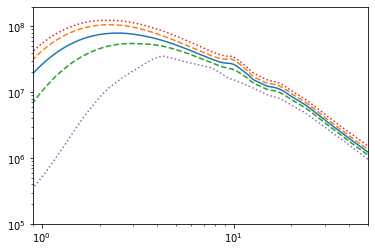

In [18]:
# Testplot data from average SED file
import matplotlib.pyplot as plt
import numpy as np

seds = np.loadtxt('../r3dresults/st28gm06n074_nospikes/average_sed.dat')

plt.xscale('log')
plt.yscale('log')

plt.xlim([0.9,50])
plt.ylim([1e5,2e8])

plt.plot(seds[:,0],seds[:,1])

plt.plot(seds[:,0],seds[:,1]+seds[:,2],'--')
plt.plot(seds[:,0],seds[:,1]-seds[:,2],'--')

plt.plot(seds[:,0],seds[:,3],':')
plt.plot(seds[:,0],seds[:,4],':')



## Plot various time-dep-plots

### Flambda(time)-plots

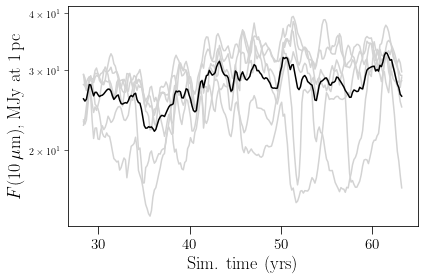

In [4]:
# Plot time-dependent plots
# 1. Plot Flambda(time)
import os
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d
from matplotlib import rc

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

# Path to model of choice
path = '../r3dresults/st28gm06n052_timedep_nospikes/'
model = '052'
#path = '../r3dresults/st28gm06n074_nospikes/'
#model = '074'


# Wavelength to plot
wavelength = 10

# Load all phases
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()
Nphases = len(phases)
phasetimes = np.loadtxt(path+'snapshot_yr.dat')[:Nphases,1]

# And angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Load wavelengthgrid and extract index for wavelength
wavelengths,spectrum = a3d.load_spectrum(
    path = f'{path}{phases[0]}/spectrum_{angles[0]}.out'
)
wavelengths = np.array(wavelengths)
wavelengthindex = int(np.where(wavelengths >= wavelength)[0][0]-1)
fluxall = np.zeros((len(angles),Nphases))

# Set figure settings
fig, ax = plt.figure(num=f'F(t) of {wavelength} um', figsize=(6, 4)), plt.axes()
ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax.set_ylabel(rf'$F({wavelength}\,\mu$m$)$, MJy at 1\,pc',fontsize=18);
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yscale('log')


# Loop through all phases and extract all flux densities at wavelength
for nangles,angle in enumerate(angles):
    for nphase,phase in enumerate(phases):

        wavelengths,spectrum = a3d.load_spectrum(
            path = f'{path}{phase}/spectrum_{angle}.out'
        )
        fluxall[nangles,nphase] = spectrum[wavelengthindex]*1e-6
    
    # Plot each angles time dependent F10 in MJy
    plt.plot(phasetimes,fluxall[nangles,:],'lightgrey')

# Save average of each angles flux density at each time
fluxaverage = []
for nphase in range(Nphases):
    fluxaverage.append(np.mean(fluxall[:,nphase]))

# and plot average flux density
ax.plot(phasetimes,fluxaverage,'k')

# and save figure
fig.tight_layout()
#plt.savefig(f'../r3dplots/{model}_fluxtime_{wavelength}um.pdf', dpi=300)


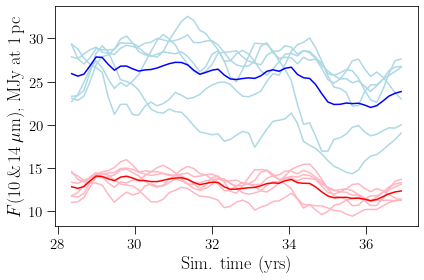

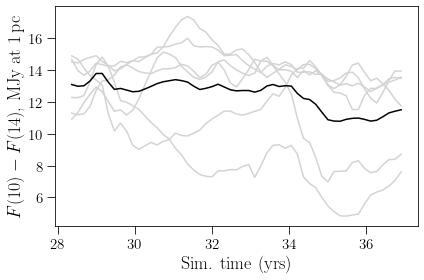

In [8]:
# Load F10 and F14 data of all SEDs and plot
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import os

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

# Path settings
path = '../r3dresults/st28gm06n052_timedep_nospikes/'
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()
Nphases = len(phases)
phasetimes = np.loadtxt(path+'snapshot_yr.dat')[:Nphases,1]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
Nangles = len(angles)

# Load wavelengthgrid and extract index for 10um
wavelengths,spectrum = a3d.load_spectrum(
    path = f'{path}{phases[0]}/spectrum_{angles[0]}.out'
)
wavelengths = np.array(wavelengths)
index10um = int(np.where(wavelengths >= 10)[0][0]-1)
index14um = int(np.where(wavelengths >= 14)[0][0]-1)

# Set up arrays to fill
f10all = np.zeros((Nangles,Nphases))
f14all = np.zeros((Nangles,Nphases))
f10average = np.zeros(Nphases)
f14average = np.zeros(Nphases)

# Initiate figures
fig1014, ax1014 = plt.figure(num='F10 and 14 stardust', figsize=(6, 4)), plt.axes()
fig10min14, ax10min14 = plt.figure(num='F10 - F14', figsize=(6, 4)), plt.axes()

# Loop over snapshots and angles
for nphase,phase in enumerate(phases):
    for nangle,angle in enumerate(angles):

        # Load all SEDs
        wavelength, spectrum = a3d.load_spectrum(
            path=f'{path}{phase}/spectrum_{angle}.out'
        )
        # Save flux densities of 10 and 14 um
        f10all[nangle,nphase] = spectrum[index10um]*1e-6
        f14all[nangle,nphase] = spectrum[index14um]*1e-6
    
    # Take LOS averaged fluxes
    f10average[nphase] = np.mean(f10all[:,nphase])
    f14average[nphase] = np.mean(f14all[:,nphase])

# Plot each angle
for nangle,angle in enumerate(angles):
    ax1014.plot(phasetimes,f10all[nangle,:],'lightblue')
    ax1014.plot(phasetimes,f14all[nangle,:],'lightpink')
    ax10min14.plot(
        phasetimes,
        f10all[nangle,:] - f14all[nangle,:],
        'lightgrey'
    )

# Plot averages
ax1014.plot(phasetimes,f10average,'blue')
ax1014.plot(phasetimes,f14average,'red')
ax10min14.plot(
    phasetimes,
    f10average - f14average,
    'black'
)




ax1014.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax1014.set_ylabel(r'$F(10\,\&\,14\,\mu$m$)$, MJy at 1\,pc',fontsize=18);
ax1014.tick_params(axis='both', which='major', labelsize=15)
fig1014.tight_layout()

ax10min14.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax10min14.set_ylabel(r'$F(10) - F(14)$, MJy at 1\,pc',fontsize=18);
ax10min14.tick_params(axis='both', which='major', labelsize=15)
fig10min14.tight_layout()

# TODO SPARA!
#fig.savefig(
#    'figs/timedep_F10.pdf',
#    dpi=300,
#    facecolor='white'
#)


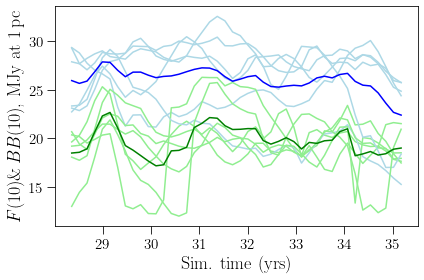

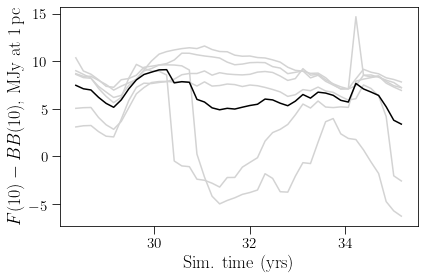

In [4]:
# Fit blackbodies to SEDs
# Extract 10um flux density of black bodies
# Take F10 - BBfit10 and plot
# Load F10 and F14 data of all SEDs and plot
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import os

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

# Path settings
path = '../r3dresults/st28gm06n052_timedep_nospikes/'
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()
Nphases = len(phases)
phasetimes = np.loadtxt(path+'snapshot_yr.dat')[:Nphases,1]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
Nangles = len(angles)

# Load wavelengthgrid and extract index for 10um
wavelengths,spectrum = a3d.load_spectrum(
    path = f'{path}{phases[0]}/spectrum_{angles[0]}.out'
)
wavelengths = np.array(wavelengths)
index10um = int(np.where(wavelengths >= 10)[0][0]-1)


# Set up arrays to fill
f10all = np.zeros((Nangles,Nphases))
f10average = np.zeros(Nphases)
BB10all = np.zeros((Nangles,Nphases))
BB10average = np.zeros(Nphases)




# Loop over snapshots and angles
for nphase,phase in enumerate(phases):
    for nangle,angle in enumerate(angles):

        # Load all SEDs
        wavelength, spectrum = a3d.load_spectrum(
            path=f'{path}{phase}/spectrum_{angle}.out'
        )
        # Fit BB to SED
        N_maxflux = np.argmax(spectrum)
        BBfit = a3d.compute_blackbody_freq(
            peak_flux = np.max(spectrum),
            peak_wavelength = wavelength[N_maxflux],
            wavelengths = wavelength
        )
        # Save flux densities of 10 um
        f10all[nangle,nphase] = spectrum[index10um]*1e-6
        BB10all[nangle,nphase] = BBfit[index10um]*1e-6

    # Take LOS averaged fluxes
    f10average[nphase] = np.mean(f10all[:,nphase])
    BB10average[nphase] = np.mean(BB10all[:,nphase])


fig10, ax10 = plt.figure(num='F10stardust and BB10', figsize=(6, 4)), plt.axes()
figFminBB, axFminBB = plt.figure(num='F10stardust minus BB10', figsize=(6, 4)), plt.axes()


# Plot each angle
for nangle,angle in enumerate(angles):
    ax10.plot(phasetimes,f10all[nangle,:],'lightblue')
    ax10.plot(phasetimes,BB10all[nangle,:],'lightgreen')
    axFminBB.plot(
        phasetimes,
        f10all[nangle,:] - BB10all[nangle,:],
        'lightgrey'
    )

# Plot averages
ax10.plot(phasetimes,f10average,'blue')
ax10.plot(phasetimes,BB10average,'green')
axFminBB.plot(
    phasetimes,
    f10average - BB10average,
    'black'
)

ax10.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax10.set_ylabel(r'$F(10)\&\,BB(10)$, MJy at 1\,pc',fontsize=18);
ax10.tick_params(axis='both', which='major', labelsize=15)
fig10.tight_layout()


axFminBB.set_xlabel(r'Sim. time (yrs)',fontsize=18);
axFminBB.set_ylabel(r'$F(10) - BB(10)$, MJy at 1\,pc',fontsize=18);
axFminBB.tick_params(axis='both', which='major', labelsize=15)
figFminBB.tight_layout()







#### Plot major events

Total included time: 12.516780467011031
Angles      : Event time ratio     Periodicity


/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:2796: RuntimeWarning: divide by zero encountered in divide
  period_axis = 1/freqs * delta_timestep


i000_phi000 : 0.0125  [0.52153252 1.25167805 0.41722602 0.78229878]
i090_phi000 : 0.075  [ 3.12919512  4.17226016 12.51678047  1.7881115 ]
i090_phi090 : 0.0625  [1.39075339 1.13788913 2.08613008 6.25839023]
i090_phi270 : 0.05  [1.7881115  6.25839023 1.39075339 2.50335609]
i180_phi000 : 0.0625  [12.51678047  0.78229878  0.7362812   1.7881115 ]
i270_phi000 : 0.0125  [-0.31291951  0.83445203  0.78229878  0.52153252]


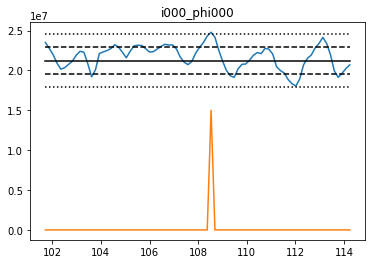

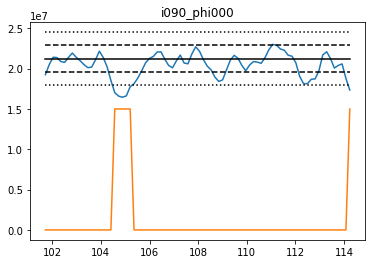

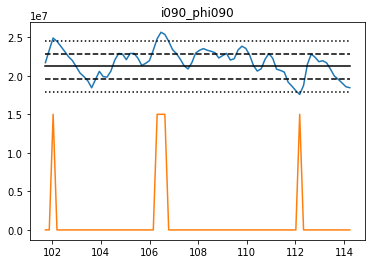

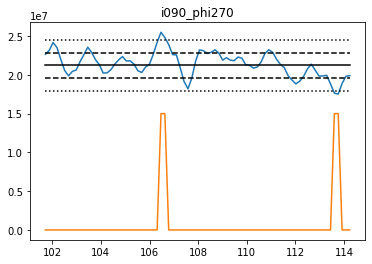

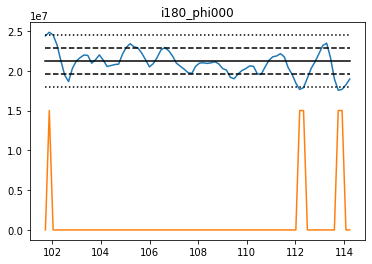

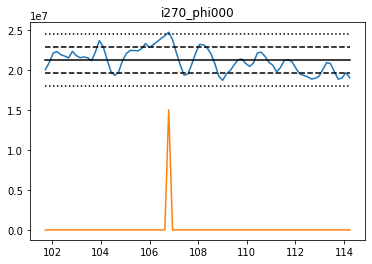

In [1]:
# Compute and plot Flux density-difference to mean SED
# Of dust EMISSION and/or ABSORPTION at 10um
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d
import os

wavelength = 10
Nsigma = 2

# Set path settings
#path = '../r3dresults/st28gm06n052_timedep_nospikes/'
#modelabbreviation = '052'
#path = '../r3dresults/st28gm06n074_nospikes/'
#modelabbreviation = '074'
path = '../r3dresults/st28gm06n075_nospikes/'
modelabbreviation = '075'


# Extract list of folders from the path folder, and make them to numbers, and sort them!
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()
# And load corresponding time
snapshot_times = np.loadtxt(path+'snapshot_yr.dat')[:,1]

# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Load average SED-data
average_seds = np.loadtxt(f'{path}average_sed.dat')
wavelengths = average_seds[:,0]

# Extract index of chosen wavelength
n10micron = np.argwhere(wavelengths >= wavelength)[0][0] - 1

# Loop through phases and extract flux density of wavelength
F10um = np.zeros(len(phases))
dustevents = np.zeros((len(angles),len(phases)))

# Print output header
print(f'Total included time: {snapshot_times[-1]-snapshot_times[0]}')
print('Angles      : Event time ratio     Periodicity')

for nangle,angle in enumerate(angles):
    # Reset single-angle event list
    F10dustevent = []

    for nphase,phase in enumerate(phases):
        wavetemp, spectrum = a3d.load_spectrum(
            path=f'{path}{phase}/spectrum_{angle}.out'
        )
        F10um[nphase] = spectrum[n10micron]

        # Extract when Fdiff > 1sigma for all snapshots
        Fdiff10 = np.abs(spectrum[n10micron] - average_seds[n10micron,1])

        if Fdiff10 > Nsigma*average_seds[n10micron,2]:
            F10dustevent.append(1)
        else:
            F10dustevent.append(0)
    # Save dustevents for each LOS
    dustevents[nangle,:] = np.array(F10dustevent)

    # Extract ratio of included time being during dust event
    event_ratio = len(np.where(dustevents[nangle] == 1)[0]) / len(phases)

    # Testplots
    plt.figure(num=nangle)
    plt.plot(snapshot_times,F10um)
     # Plot average
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n10micron,1],average_seds[n10micron,1]],
        'k'
    )
    # Plot 1std
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n10micron,1]+average_seds[n10micron,2],average_seds[n10micron,1]+average_seds[n10micron,2]],
        'k--'
    )
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n10micron,1]-average_seds[n10micron,2],average_seds[n10micron,1]-average_seds[n10micron,2]],
        'k--'
    )
    # Plot 2std
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n10micron,1]+2*average_seds[n10micron,2],average_seds[n10micron,1]+2*average_seds[n10micron,2]],
        'k:'
    )
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n10micron,1]-2*average_seds[n10micron,2],average_seds[n10micron,1]-2*average_seds[n10micron,2]],
        'k:'
    )
    plt.plot(snapshot_times,dustevents[nangle]*1.5e7)
    plt.title(angle)

    # Check if there are events:
    if np.sum(dustevents[nangle]) != 0:
        # Extract periodicity of dustevents
        periods = a3d.compute_period(
            signal=dustevents[nangle],
            timeaxis=snapshot_times
        )
        # Print output
        print(f'{angle} : {event_ratio}  {periods}')
    else:
        # Print output
        print(f'{angle} : N/A')


Total included time: 12.516780467011031
Angles      : Event time ratio     Periodicity
i000_phi000 : 0.025  [12.51678047  6.25839023  4.17226016  2.08613008]


/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:2796: RuntimeWarning: divide by zero encountered in divide
  period_axis = 1/freqs * delta_timestep


i090_phi000 : 0.0625  [12.51678047  6.25839023  4.17226016  2.50335609]
i090_phi090 : 0.0375  [12.51678047  6.25839023  4.17226016  2.50335609]
i090_phi270 : 0.0125  [0.7362812  0.37929638 0.54420785 0.46358446]
i180_phi000 : 0.0125  [0.54420785 0.69537669 0.65877792 1.56459756]
i270_phi000 : N/A


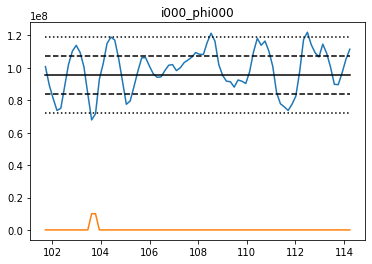

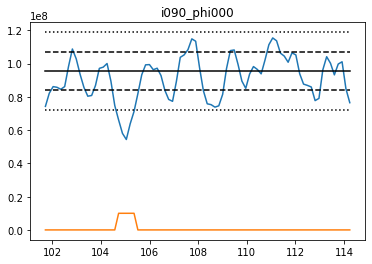

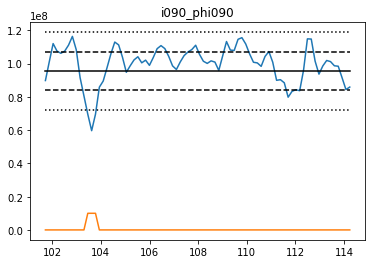

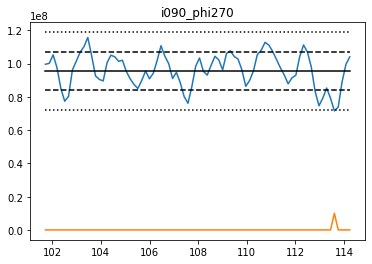

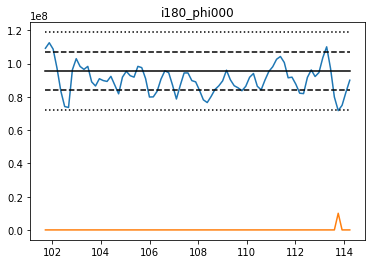

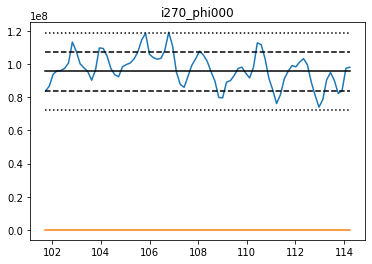

In [2]:
# Compute and plot Flux density-difference to mean SED
# Of dust obscuration of star at 2um
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d
import os

wavelength = 2
Nsigma = 2

# Set path settings
#path = '../r3dresults/st28gm06n052_timedep_nospikes/'
#modelabbreviation = '052'
#path = '../r3dresults/st28gm06n074_nospikes/'
#modelabbreviation = '074'
path = '../r3dresults/st28gm06n075_nospikes/'
modelabbreviation = '075'


# Extract list of folders from the path folder, and make them to numbers, and sort them!
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()
# And load corresponding time
snapshot_times = np.loadtxt(path+'snapshot_yr.dat')[:,1]

# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Load average SED-data
average_seds = np.loadtxt(f'{path}average_sed.dat')
wavelengths = average_seds[:,0]

# Extract index of chosen wavelength
n2micron = np.argwhere(wavelengths >= wavelength)[0][0] - 1

# Loop through phases and extract flux density of wavelength
F2um = np.zeros(len(phases))
dustevents = np.zeros((len(angles),len(phases)))

# Print output header
print(f'Total included time: {snapshot_times[-1]-snapshot_times[0]}')
print('Angles      : Event time ratio     Periodicity')

for nangle,angle in enumerate(angles):
    # Reset single-angle event list
    F2dustevent = []

    for nphase,phase in enumerate(phases):
        wavetemp, spectrum = a3d.load_spectrum(
            path=f'{path}{phase}/spectrum_{angle}.out'
        )
        F2um[nphase] = spectrum[n2micron]

        # Extract when F2 goes below Faverage-Nsigma for all snapshots
        if spectrum[n2micron] < average_seds[n2micron,1] - Nsigma*average_seds[n2micron,2]:
            F2dustevent.append(1)
        else:
            F2dustevent.append(0)

    # Save dustevents for each LOS
    dustevents[nangle,:] = np.array(F2dustevent)

    # Extract ratio of included time being during dust event
    event_ratio = len(np.where(dustevents[nangle] == 1)[0]) / len(phases)

    # plots
    plt.figure(num=nangle)
    plt.plot(snapshot_times,F2um)
    # Plot average
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n2micron,1],average_seds[n2micron,1]],
        'k'
    )
    # Plot 1std
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n2micron,1]+average_seds[n2micron,2],average_seds[n2micron,1]+average_seds[n2micron,2]],
        'k--'
    )
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n2micron,1]-average_seds[n2micron,2],average_seds[n2micron,1]-average_seds[n2micron,2]],
        'k--'
    )
    # Plot 2std
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n2micron,1]+2*average_seds[n2micron,2],average_seds[n2micron,1]+2*average_seds[n2micron,2]],
        'k:'
    )
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [average_seds[n2micron,1]-2*average_seds[n2micron,2],average_seds[n2micron,1]-2*average_seds[n2micron,2]],
        'k:'
    )
    plt.plot(snapshot_times,dustevents[nangle]*1e7)
    plt.title(angle)

    # Check if there are events:
    if np.sum(dustevents[nangle]) != 0:
        # Extract periodicity of dustevents
        periods = a3d.compute_period(
            signal=dustevents[nangle],
            timeaxis=snapshot_times
        )
        # Print output
        print(f'{angle} : {event_ratio}  {periods}')
    else:
        # Print output
        print(f'{angle} : N/A')

#### Extract flux based event-statistics

i000_phi000


/home/joachim/exwings/exwings-codes/analyze_timedep_functions.py:452: RuntimeWarning: divide by zero encountered in divide
  period_axis = 1/freqs * delta_timestep
/home/joachim/exwings/exwings-codes/analyze_timedep_functions.py:540: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


  FFT: [34.85688584  1.45237024 17.42844292 11.61896195]
  Total included time: 34.85688583615784 time units
  Number of events: 14
  Average pediod between events: 2.4897775597255603 time units
  Total length of events: 7.446549872424413 time units
  Average length of events: 0.5318964194588867 time units
  Portion of events: 0.21363210435454152

i090_phi000
  FFT: [ 3.87298732 17.42844292  1.83457294  2.32379239]
  Total included time: 34.85688583615784 time units
  Number of events: 7
  Average pediod between events: 4.9795551194511205 time units
  Total length of events: 3.485619089219938 time units
  Average length of events: 0.49794558417427687 time units
  Portion of events: 0.09999800629361519

i090_phi090
  FFT: [ 2.32379239  3.87298732  1.93649366 34.85688584]
  Total included time: 34.85688583615784 time units
  Number of events: 4
  Average pediod between events: 8.71422145903946 time units
  Total length of events: 1.901246775938148 time units
  Average length of events: 0

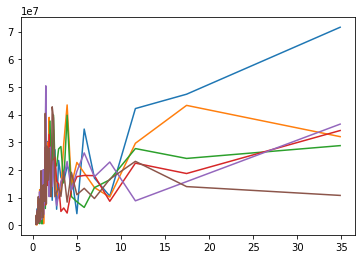

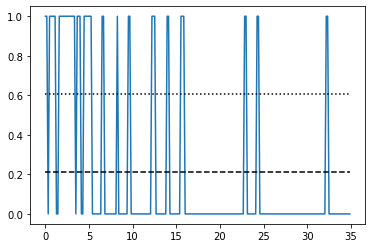

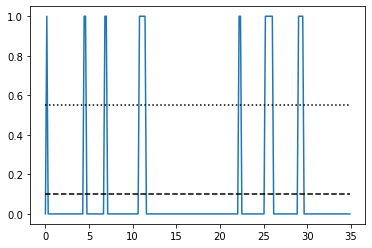

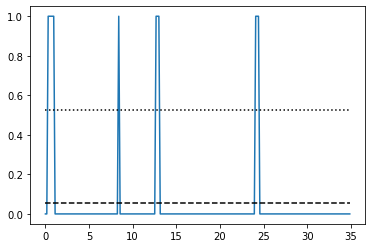

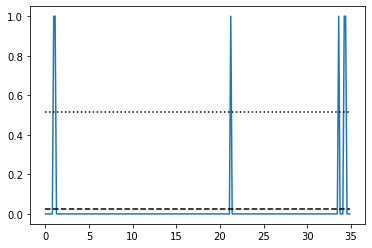

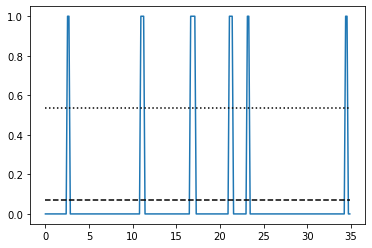

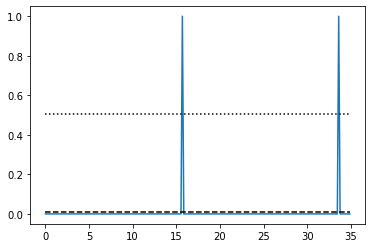

In [1]:
# For 2um
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d
import analyze_timedep_functions as atf
import os

wavelength = 2
fluxlimit = 0.8
#fluxlimit = 0.6


# Set path settings
#path = '../r3dresults/st28gm06n052_timedep_nospikes/'
#modelabbreviation = '052'
#path = '../r3dresults/st28gm06n074_nospikes/'
#modelabbreviation = '074'
path = '../r3dresults/st28gm06n075_nospikes/'
modelabbreviation = '075'


# Extract list of folders from the path folder, and make them to numbers, and sort them!
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()
Nphases = len(phases)
# And load corresponding time
snapshot_times = np.loadtxt(path+'snapshot_yr.dat')[:,1]


# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
Nangles = len(angles)
# Load average SED-data
average_seds = np.loadtxt(f'{path}average_sed.dat')
wavelengths = average_seds[:,0]


# Extract index of chosen wavelength and average flux density at wavelength
waveindex = np.argwhere(wavelengths >= wavelength)[0][0] - 1
average_flux = average_seds[waveindex,1]

# Loop through phases and extract events for each angle and phase
for nangle,angle in enumerate(angles):
    dustevents = np.zeros(Nphases)
    fluxdensity = np.zeros(Nphases)
    for nphase,phase in enumerate(phases):
        wavetemp, spectrum = a3d.load_spectrum(
            path=f'{path}{phase}/spectrum_{angle}.out'
        )
        fluxdensity[nphase] = spectrum[waveindex]

        if fluxdensity[nphase] <= fluxlimit * average_flux:
            dustevents[nphase] = 1
    # print angle
    print(angle)
    # Extract FFT
    period = atf.compute_period(
        signal=fluxdensity,
        timeaxis=snapshot_times,
        plot_spec='y'
    )
    print(f'  FFT: {period}')
    # Extract statistics
    if np.sum(dustevents) != 0:

        atf.extract_events(
            eventdata=dustevents,
            timerange=snapshot_times,
            relative_limit=0.5
        )
    else:
        print('  N/A\n')



i000_phi000


/home/joachim/exwings/exwings-codes/analyze_timedep_functions.py:452: RuntimeWarning: divide by zero encountered in divide
  period_axis = 1/freqs * delta_timestep


  FFT: [34.85688584 17.42844292  3.87298732  1.83457294]
  N/A

i090_phi000
  FFT: [34.85688584  2.32379239  3.87298732  4.35711073]
  Total included time: 34.85688583615784 time units
  Number of events: 2
  Average pediod between events: 17.42844291807892 time units
  Total length of events: 0.475311693984537 time units
  Average length of events: 0.2376558469922685 time units
  Portion of events: 0.01363609176731116



/home/joachim/exwings/exwings-codes/analyze_timedep_functions.py:540: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


i090_phi090
  FFT: [3.87298732 1.93649366 1.65985171 4.35711073]
  Total included time: 34.85688583615784 time units
  Number of events: 1
  Average pediod between events: 34.85688583615784 time units
  Total length of events: 0.475311693984537 time units
  Average length of events: 0.475311693984537 time units
  Portion of events: 0.01363609176731116

i090_phi270
  FFT: [34.85688584  5.80948097  1.93649366  8.71422146]
  N/A

i180_phi000
  FFT: [ 5.80948097 34.85688584  6.97137717 17.42844292]
  Total included time: 34.85688583615784 time units
  Number of events: 1
  Average pediod between events: 34.85688583615784 time units
  Total length of events: 0.316874462656358 time units
  Average length of events: 0.316874462656358 time units
  Portion of events: 0.009090727844874108

i270_phi000
  FFT: [ 4.35711073  5.80948097  2.32379239 11.61896195]
  Total included time: 34.85688583615784 time units
  Number of events: 2
  Average pediod between events: 17.42844291807892 time units
  To

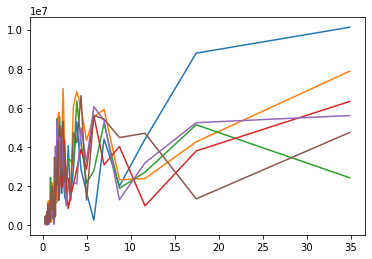

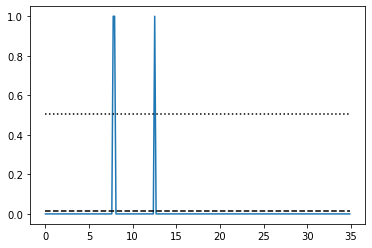

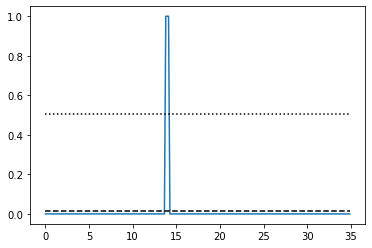

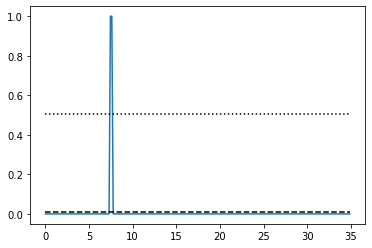

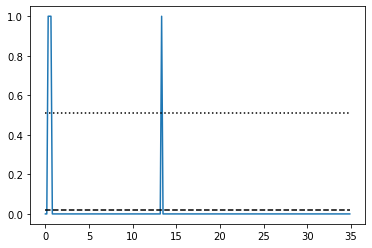

In [1]:
# For 10um
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d
import analyze_timedep_functions as atf
import os

wavelength = 10
fluxlimit = 1.2

# Set path settings
#path = '../r3dresults/st28gm06n052_timedep_nospikes/'
#modelabbreviation = '052'
#path = '../r3dresults/st28gm06n074_nospikes/'
#modelabbreviation = '074'
path = '../r3dresults/st28gm06n075_nospikes/'
modelabbreviation = '075'


# Extract list of folders from the path folder, and make them to numbers, and sort them!
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()
Nphases = len(phases)
# And load corresponding time
snapshot_times = np.loadtxt(path+'snapshot_yr.dat')[:,1]


# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
Nangles = len(angles)
# Load average SED-data
average_seds = np.loadtxt(f'{path}average_sed.dat')
wavelengths = average_seds[:,0]


# Extract index of chosen wavelength and average flux density at wavelength
waveindex = np.argwhere(wavelengths >= wavelength)[0][0] - 1
average_flux = average_seds[waveindex,1]

# Loop through phases and extract events for each angle and phase
for nangle,angle in enumerate(angles):
    dustevents = np.zeros(Nphases)
    fluxdensity = np.zeros(Nphases)
    
    for nphase,phase in enumerate(phases):
        wavetemp, spectrum = a3d.load_spectrum(
            path=f'{path}{phase}/spectrum_{angle}.out'
        )
        fluxdensity[nphase] = spectrum[waveindex]

        if fluxdensity[nphase] >= fluxlimit * average_flux:
            dustevents[nphase] = 1
    
    # print angle
    print(angle)
    
    # Extract FFT
    period = atf.compute_period(
        signal=fluxdensity,
        timeaxis=snapshot_times,
        plot_spec='y'
    )
    print(f'  FFT: {period}')
    # Extract statistics
    if np.sum(dustevents) != 0:

        atf.extract_events(
            eventdata=dustevents,
            timerange=snapshot_times,
            relative_limit=0.5
        )
    else:
        print('  N/A\n')




In [2]:
# Extract some numbers of flux density variations
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d
import analyze_timedep_functions as atf
import os



# Set path settings
paths = [
    '../r3dresults/st28gm06n052_timedep_nospikes/',
    '../r3dresults/st28gm06n074_nospikes/',
    '../r3dresults/st28gm06n075_nospikes/'
]
modelabbreviations = [
    '052',
    '074',
    '075'
]
# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
Nangles = len(angles)
# Set wavelengths
obswavelengths = [
    2,10
]

# vad vill jag ha?
#%       2um:
#%           Fmean      :
#%           Fst        :
#%           Fmin       :
#%           Fmin/Fmean :
#%           Fmin(#std) :
#%
#%       10um
#%           Fmean      :
#%           Fst        :
#%           Fmax       :
#%           Fmax/Fmean :
#%           Fmax(#std) :

# Loop over models
for path,modelabbreviation in zip(paths,modelabbreviations):

    # Extract list of folders from the path folder, and make them to numbers, and sort them!
    phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
    phases.sort()
    Nphases = len(phases)
    # And load corresponding time
    snapshot_times = np.loadtxt(path+'snapshot_yr.dat')[:,1]
    # Load average SED-data
    # 0           1         2    3     4
    # Wavelength  AverageF  STD  MaxF  MinF
    average_seds = np.loadtxt(f'{path}average_sed.dat')
    wavelengths = average_seds[:,0]


    # Start output
    print(modelabbreviation)

    # Loop over obswavelengths
    for wavelength in obswavelengths:

        # Extract index of chosen wavelength and average flux density at wavelength
        waveindex = np.argwhere(wavelengths >= wavelength)[0][0] - 1

        flux_average = average_seds[waveindex,1]
        flux_std = average_seds[waveindex,2]

        print(f'  {wavelength}')
        print(f'    Fmean: {flux_average*1e-6} MJy')
        print(f'    Fstd: {flux_std*1e-6} MJy')

        if wavelength == 2:
            flux_xtr = average_seds[waveindex,4]
            flux_nstd = (flux_average-flux_xtr)/flux_std
            print(f'    Fmin: {flux_xtr*1e-6} MJy')
            print(f'    Fmin/Fmean: {flux_xtr/flux_average}')
            print(f'    Fmin(Nstd)): {flux_nstd}')

        if wavelength == 10:
            flux_xtr = average_seds[waveindex,3]
            flux_nstd = (flux_xtr-flux_average)/flux_std
            print(f'    Fmax: {flux_xtr*1e-6} MJy')
            print(f'    Fmax/Fmean: {flux_xtr/flux_average}')
            print(f'    Fmax(Nstd)): {flux_nstd}')
        




















052
  2
    Fmean: 68.7262788163282 MJy
    Fstd: 30.183867221714262 MJy
    Fmin: 2.1709089070299994 MJy
    Fmin/Fmean: 0.03158775572342246
    Fmin(Nstd)): 2.2049981011518067
  10
    Fmean: 27.65005703767243 MJy
    Fstd: 5.014713840804647 MJy
    Fmax: 39.280923590569984 MJy
    Fmax/Fmean: 1.4206453005522133
    Fmax(Nstd)): 2.319348007110073
074
  2
    Fmean: 80.89358758731919 MJy
    Fstd: 25.980940554945345 MJy
    Fmin: 3.688357482850999 MJy
    Fmin/Fmean: 0.04559517747769148
    Fmin(Nstd)): 2.9716102825912727
  10
    Fmean: 25.475610760755295 MJy
    Fstd: 4.225935255902904 MJy
    Fmax: 35.79189816225999 MJy
    Fmax/Fmean: 1.4049475986419426
    Fmax(Nstd)): 2.4411844424484768
075
  2
    Fmean: 95.13546821230672 MJy
    Fstd: 12.768271227566736 MJy
    Fmin: 54.38030470787998 MJy
    Fmin/Fmean: 0.5716091561826712
    Fmin(Nstd)): 3.1919092865474394
  10
    Fmean: 21.633061960402937 MJy
    Fstd: 1.9445184423003319 MJy
    Fmax: 27.230959640009996 MJy
    Fmax/Fmean:

### Dustmass(time)-plots

052
  Total included time: 34.856945436820816 time units
  Relative limit: 0.1
  Number of events: 13
  Average pediod between events: 2.681303495140063 time units
  Total length of events: 6.653484223737372 time units
  Average length of events: 0.5118064787490286 time units
  Portion of events: 0.19087972684803944

074
  Total included time: 34.856902966335056 time units
  Relative limit: 0.1
  Number of events: 8
  Average pediod between events: 4.357112870791882 time units
  Total length of events: 6.021893646389913 time units
  Average length of events: 0.7527367057987391 time units
  Portion of events: 0.17276043291068868

075
  Total included time: 34.85688583615784 time units
  Relative limit: 0.1
  Number of events: 5
  Average pediod between events: 6.9713771672315685 time units
  Total length of events: 3.16874462656358 time units
  Average length of events: 0.633748925312716 time units
  Portion of events: 0.09090727844874108

052: [34.85694544 17.42847272  3.87299394  1.34

/home/joachim/exwings/exwings-codes/analyze_timedep_functions.py:541: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/joachim/exwings/exwings-codes/analyze_timedep_functions.py:452: RuntimeWarning: divide by zero encountered in divide
  period_axis = 1/freqs * delta_timestep


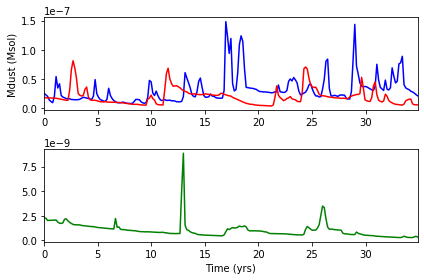

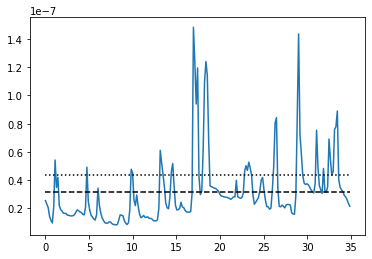

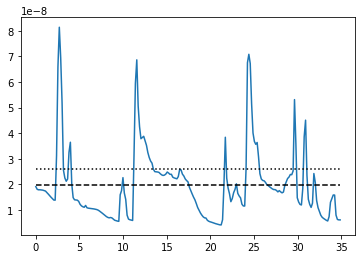

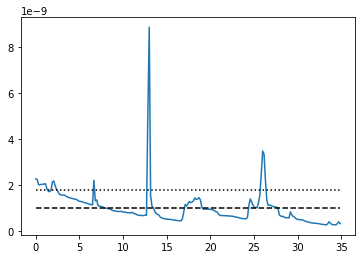

In [4]:
# Load and plot dust mass vs time
import numpy as np
import matplotlib.pyplot as plt
import analyze_timedep_functions as atf

# Load data from *052 model
path052 = '../r3dresults/st28gm06n052_timedep_nospikes/'
phasetimes052 = np.loadtxt(path052+'snapshot_yr.dat')[:,1]
dustmass052 = np.loadtxt(path052+'dustmass.dat')[:,1]
time052 = phasetimes052 - phasetimes052[0]
# Statistics
totaltime052 = phasetimes052[-1]-phasetimes052[0] # Total time length in yrs


# Load data from *074 model
path074 = '../r3dresults/st28gm06n074_nospikes/'
phasetimes074 = np.loadtxt(path074+'snapshot_yr.dat')[:,1]
dustmass074 = np.loadtxt(path074+'dustmass.dat')[:,1]
time074 = phasetimes074 - phasetimes074[0]
# Statistics
totaltime074 = phasetimes074[-1]-phasetimes074[0] # Total time length in yrs
meanmass074 = np.mean(dustmass074)
maxmass074 = np.max(dustmass074)


# Load data from *075 model
path075 = '../r3dresults/st28gm06n075_nospikes/'
phasetimes075 = np.loadtxt(path075+'snapshot_yr.dat')[:,1]
dustmass075 = np.loadtxt(path075+'dustmass.dat')[:,1]
time075 = phasetimes075 - phasetimes075[0]
# Statistics
totaltime075 = phasetimes075[-1]-phasetimes075[0] # Total time length in yrs
meanmass075 = np.mean(dustmass075)
maxmass075 = np.max(dustmass075)


# Iniatiate figure object
fig,ax = plt.subplots(2,1)

# Plot both dust masses on top of eachother
ax[0].plot(time052,dustmass052,'b')
ax[0].plot(time074,dustmass074,'r')
ax[1].plot(time075,dustmass075,'g')

ax[0].set_ylabel('Mdust (Msol)')
ax[1].set_xlabel('Time (yrs)')
ax[0].set_xlim([time052[0],time052[-1]])
ax[1].set_xlim([time052[0],time052[-1]])

# Save figure for reference later
fig.tight_layout()
fig.savefig('../r3dplots/052_074_075_dustmasscompare.pdf', dpi=300)
#
# Extract occurance of events and plot to check
#
relative_limit = 0.1

print('052')
atf.extract_events(
    eventdata = dustmass052,
    timerange = phasetimes052,
    relative_limit=relative_limit
)
print('074')
atf.extract_events(
    eventdata = dustmass074,
    timerange = phasetimes074,
    relative_limit=relative_limit
)
print('075')
atf.extract_events(
    eventdata = dustmass075,
    timerange = phasetimes075,
    relative_limit=relative_limit
)

#
# Show figs
#fig.show()

# Extract periodicity
dustprodperiod052 = atf.compute_period(
    signal=dustmass052,
    timeaxis=time052,
)
print(f'052: {dustprodperiod052} yrs')

dustprodperiod074 = atf.compute_period(
    signal=dustmass074,
    timeaxis=time074,
)
print(f'074: {dustprodperiod074} yrs')

dustprodperiod075 = atf.compute_period(
    signal=dustmass075,
    timeaxis=time075,
)
print(f'075: {dustprodperiod075} yrs')


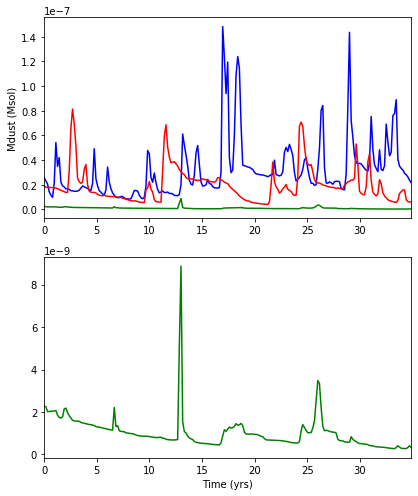

In [7]:
# Load and plot dust mass vs time
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d

# Load data from *052 model
path052 = '../r3dresults/st28gm06n052_timedep_nospikes/'
phasetimes052 = np.loadtxt(path052+'snapshot_yr.dat')[:,1]
dustmass052 = np.loadtxt(path052+'dustmass.dat')[:,1]
time052 = phasetimes052 - phasetimes052[0]

# Load data from *074 model
path074 = '../r3dresults/st28gm06n074_nospikes/'
phasetimes074 = np.loadtxt(path074+'snapshot_yr.dat')[:,1]
dustmass074 = np.loadtxt(path074+'dustmass.dat')[:,1]
time074 = phasetimes074 - phasetimes074[0]

# Load data from *075 model
path075 = '../r3dresults/st28gm06n075_nospikes/'
phasetimes075 = np.loadtxt(path075+'snapshot_yr.dat')[:,1]
dustmass075 = np.loadtxt(path075+'dustmass.dat')[:,1]
time075 = phasetimes075 - phasetimes075[0]

# Iniatiate figure object
fig,ax = plt.subplots(2,1, figsize=(6,7))


# Plot both dust masses on top of eachother
ax[0].plot(time052,dustmass052,'b')
ax[0].plot(time074,dustmass074,'r')
ax[0].plot(time075,dustmass075,'g')
ax[1].plot(time075,dustmass075,'g')

ax[0].set_ylabel('Mdust (Msol)')
ax[1].set_xlabel('Time (yrs)')
ax[0].set_xlim([time052[0],time052[-1]])
ax[1].set_xlim([time052[0],time052[-1]])


# Save figure
fig.tight_layout()

In [ ]:
# Print mean and median dust masses
import numpy as np

# Load data from *052 model
path052 = '../r3dresults/st28gm06n052_timedep_nospikes/'
dustmass052 = np.loadtxt(path052+'dustmass.dat')[:,1]

# Load data from *074 model
path074 = '../r3dresults/st28gm06n074_nospikes/'
dustmass074 = np.loadtxt(path074+'dustmass.dat')[:,1]

# Load data from *075 model
path075 = '../r3dresults/st28gm06n075_nospikes/'
dustmass075 = np.loadtxt(path075+'dustmass.dat')[:,1]

print(f'052\n  mean: {np.mean(dustmass052)} Msol\n  median: {np.median(dustmass052)} Msol\n')
print(f'074\n  mean: {np.mean(dustmass074)} Msol\n  median: {np.median(dustmass074)} Msol\n')
print(f'075\n  mean: {np.mean(dustmass075)} Msol\n  median: {np.median(dustmass075)} Msol\n')




052
  mean: 3.1776680292172366e-08 Msol
  median: 2.598811254611197e-08 Msol

074
  mean: 1.9608047175062693e-08 Msol
  median: 1.7004422379805567e-08 Msol

075
  mean: 1.0274235394461546e-09 Msol
  median: 8.64211781470254e-10 Msol



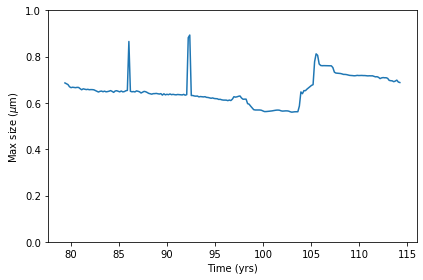

In [3]:
# Plot 075's max grain size bin vs time
import numpy as np
import matplotlib.pyplot as plt

# Load data from *075 model
path075 = '../r3dresults/st28gm06n075_nospikes/'
phasetimes075 = np.loadtxt(path075+'snapshot_yr.dat')[:,1]
grainsize075 = np.loadtxt(path075+'maxgrainsize.dat')[:,1]

plt.plot(phasetimes075,grainsize075)
plt.xlabel('Time (yrs)')
plt.ylabel(r'Max size ($\mu$m)')
plt.ylim([0,1])
plt.tight_layout()
plt.savefig('../r3dplots/075_maxgrainsize.pdf', dpi=300)


### Lum(time)-plots

In [8]:
# Extract luminosity of all spectra in Lsol
import os
import numpy as np
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d
from matplotlib import rc

Lsol = 3.828e26 # Watt

paths = [
    '../r3dresults/st28gm06n052_timedep_nospikes/',
    #'../r3dresults/st28gm06n052_timedep_nodust/',
    #'../r3dresults/st28gm06n074_nospikes/',
    #'../r3dresults/st28gm06n074_nodust/',
    #'../r3dresults/st28gm06n075_nospikes/',
    #'../r3dresults/st28gm06n075_nodust/',
]
for path in paths:

    phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
    phases.sort()
    Nphases = len(phases)
    angles = [
        'i000_phi000',
        'i090_phi000',
        'i090_phi090',
        'i090_phi270',
        'i180_phi000',
        'i270_phi000',
    ]
    # Start printing output stuff in dat-file
    with open(f'{path}luminosity.dat', 'w') as flum:
        flum.write(f'# Number of phases: {Nphases}\n')
        flum.write(f'#  Phase  {angles[0]}  {angles[1]}  {angles[2]}  {angles[3]}  {angles[4]}  {angles[5]}  Average\n')

        # Loop through time
        for phase in phases:

            # Declare an LOS-average luminosity
            lumaverage = 0
            # and a lift for lums in direction
            luminosities = []

            # Loop through angles
            for angle in angles:
                luminosity = a3d.compute_sed_luminosity(
                    path = f'{path}{phase}/spectrum_{angle}.out'
                )/Lsol
                lumaverage += luminosity
                luminosities.append(luminosity)

            lumaverage /= 6            
            flum.write(f'   {phase}    {luminosities[0]:.3f}     {luminosities[1]:.3f}     {luminosities[2]:.3f}     {luminosities[3]:.3f}     {luminosities[4]:.3f}     {luminosities[5]:.3f}     {lumaverage:.3f}\n')

    print(path.split('/')[-2])
    print('  Writing Lums: Done')


st28gm06n052_timedep_nospikes
  Writing Lums: Done


  Total included time: 34.85688583615784 time units
  Relative limit: 0.1
  Number of events: 24
  Average pediod between events: 1.4523702431732435 time units
  Total length of events: 13.308727431567036 time units
  Average length of events: 0.5545303096486265 time units
  Portion of events: 0.38181056948471254

  FFT-Periods: [1.45237024 1.65985171 1.51551678 1.39427543] yrs


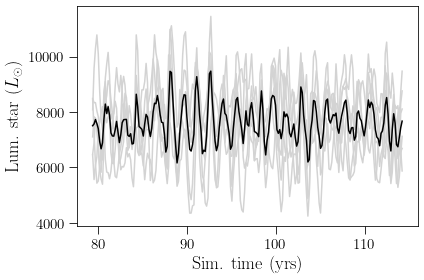

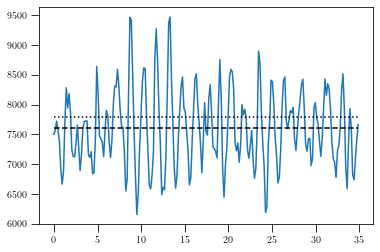

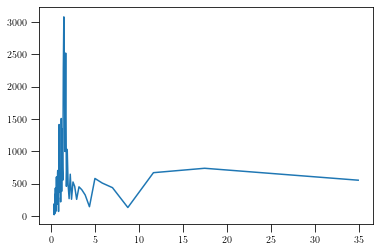

In [ ]:
# Plot all luminosities vs time and extract statistics
import numpy as np
import os
import matplotlib.pyplot as plt
import analyze_timedep_functions as atf
from matplotlib import rc


# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

# Set paths and model name
#path = '../r3dresults/st28gm06n052_timedep_nodust/'
#modelabbreviation = '052_nodust'
#path = '../r3dresults/st28gm06n052_timedep_nospikes/'
#modelabbreviation = '052'

#path = '../r3dresults/st28gm06n074_nodust/'
#modelabbreviation = '074_nodust'
#path = '../r3dresults/st28gm06n074_nospikes/'
#modelabbreviation = '074'

path = '../r3dresults/st28gm06n075_nodust/'
modelabbreviation = '075_nodust'
#path = '../r3dresults/st28gm06n075_nospikes/'
#modelabbreviation = '075'


# Extract phases, times, lums
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()
Nphases = len(phases)
phasetimes = np.loadtxt(path+'snapshot_yr.dat')[:,1]
luminosities = np.loadtxt(path+'luminosity.dat')
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
Nangles = len(angles)

# Plot all angles as grey and average as black ontop
fig, ax = plt.figure(num=1, figsize=(6, 4)), plt.axes()

for nangle in range(Nangles):
    ax.plot(phasetimes,luminosities[:,nangle+1],color='lightgrey')

# Average is the last column
ax.plot(phasetimes,luminosities[:,-1],'-',color='black')
ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);

# Change ylabel according to dust or not
if len(modelabbreviation) > 3:
    ax.set_ylabel(r'Lum. star ($L_\odot$)',fontsize=18);
else:
    ax.set_ylabel(r'Lum. star and dust ($L_\odot$)',fontsize=18);

ax.tick_params(
    axis='both', 
    which='major', 
    labelsize=15
)
ax.grid(
    visible=False,
    which='both',
    axis='x'
)
fig.tight_layout()
fig.savefig(
    f'/home/joachim/exwings/r3dplots/{modelabbreviation}_lum_vs_time.pdf',
    dpi=300,
    facecolor='white'
)
# Extract event-statistics
atf.extract_events(
    eventdata = luminosities[:,-1],
    timerange = phasetimes,
    relative_limit=0.1
)

# Extract periodicity of the highest numbers of the fft
periods = atf.compute_period(
    signal = luminosities[:,-1],
    timeaxis = phasetimes,
    plot_spec='y'
)
print(f'  FFT-Periods: {periods} yrs')



#### Extract some Lum and flux numbers

In [2]:
# Load and extract verious liminosities for the paper
import numpy as np
import os

paths = [
    '../r3dresults/st28gm06n052_timedep_nodust/',
    '../r3dresults/st28gm06n074_nodust/',
    '../r3dresults/st28gm06n075_nodust/',
    '../r3dresults/st28gm06n052_timedep_nospikes/',
    '../r3dresults/st28gm06n074_nospikes/',
    '../r3dresults/st28gm06n075_nospikes/',
]
modelabbreviations = [
    '052_nodust',
    '074_nodust',
    '075_nodust',
    '052_nospikes',
    '074_nospikes',
    '075_nospikes',
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
Nangles = len(
    angles
)
for path,modelabbreviation in zip(paths,modelabbreviations):

    # Extract phases, times, lums
    phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
    phases.sort()
    Nphases = len(phases)
    phasetimes = np.loadtxt(path+'snapshot_yr.dat')[:,1]
    luminosities = np.loadtxt(path+'luminosity.dat')
    # [:,0] - snapshots
    # [:,1 tom 6] - angle-dependent lums
    # [:,-1] - angle-averaged lums

    # Print average luminosities
    print(f'  {modelabbreviation} - average lum: {np.mean(luminosities[:,-1])} Lsol')

    
    if modelabbreviation[-8:] == 'nospikes':

        # Print average max-lum with dust
        print(f'  {modelabbreviation} - average max lum: {np.max(luminosities[:,-1])} Lsol')

        # Print the max-max lum, max of all angles
        print(f'  {modelabbreviation} - max-max lum: {np.max(luminosities[:,1:-1])} Lsol')

        # Print average minimum lum with dust
        print(f'  {modelabbreviation} - average min lum: {np.min(luminosities[:,-1])} Lsol')

        # Print min-min lum with dust
        print(f'  {modelabbreviation} - min-min lum: {np.min(luminosities[:,1:-1])} Lsol')









  052_nodust - average lum: 7623.889592760182 Lsol
  074_nodust - average lum: 7632.387339366515 Lsol
  075_nodust - average lum: 7603.132628959276 Lsol
  052_nospikes - average lum: 5325.214027149322 Lsol
  052_nospikes - average max lum: 7948.66 Lsol
  052_nospikes - max-max lum: 11216.202 Lsol
  052_nospikes - average min lum: 3217.095 Lsol
  052_nospikes - min-min lum: 583.556 Lsol
  074_nospikes - average lum: 6146.020846153845 Lsol
  074_nospikes - average max lum: 8237.554 Lsol
  074_nospikes - max-max lum: 11017.651 Lsol
  074_nospikes - average min lum: 4403.186 Lsol
  074_nospikes - min-min lum: 766.543 Lsol
  075_nospikes - average lum: 7314.732800904978 Lsol
  075_nospikes - average max lum: 9101.957 Lsol
  075_nospikes - max-max lum: 10948.281 Lsol
  075_nospikes - average min lum: 5911.108 Lsol
  075_nospikes - min-min lum: 3815.841 Lsol


In [19]:
# write out min, max, average flux densities at 2um and 10um
import numpy as np
import os

paths = [
    '../r3dresults/st28gm06n052_timedep_nodust/',
    '../r3dresults/st28gm06n074_nodust/',
    '../r3dresults/st28gm06n075_nodust/',
    '../r3dresults/st28gm06n052_timedep_nospikes/',
    '../r3dresults/st28gm06n074_nospikes/',
    '../r3dresults/st28gm06n075_nospikes/',
]
modelabbreviations = [
    '052_nodust',
    '074_nodust',
    '075_nodust',
    '052_nospikes',
    '074_nospikes',
    '075_nospikes',
]
for path,modelabbreviation in zip(paths,modelabbreviations):

    # Extract phases, times, lums
    phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
    phases.sort()
    Nphases = len(phases)
    phasetimes = np.loadtxt(path+'snapshot_yr.dat')[:,1]
    flux_densities = np.loadtxt(path+'average_sed.dat')
    # [:,0] - wavelength
    # [:,1] - averageF
    # [:,2] - std
    # [:,3] - max
    # [:,4] - min

    # Find index of 2 and 10um
    ntwomicron = np.argwhere(flux_densities[:,0] > 2)[0][0] - 1
    ntenmicron = np.argwhere(flux_densities[:,0] > 10)[0][0] - 1

    # Print average flux densities
    print(f'  {modelabbreviation} - average  F2um: {flux_densities[ntwomicron,1]*1e-6:.3f} MJy')
    print(f'  {modelabbreviation} - average F10um: {flux_densities[ntenmicron,1]*1e-6:.3f} MJy')

    
    if modelabbreviation[-8:] == 'nospikes':
        # Print min/max flux densities
        print(f'  {modelabbreviation} - min  F2um: {flux_densities[ntwomicron,4]*1e-6:.3f} MJy')
        print(f'  {modelabbreviation} - max F10um: {flux_densities[ntenmicron,3]*1e-6:.3f} MJy')

        # Print difference to average
        print(f'  {modelabbreviation} - aver-min  F2um: {(flux_densities[ntwomicron,1]-flux_densities[ntwomicron,4])*1e-6:.3f} MJy')
        print(f'  {modelabbreviation} - max-aver F10um: {(flux_densities[ntenmicron,3]-flux_densities[ntenmicron,1])*1e-6:.3f} MJy')

    # Print relative difference to average
    print(f'  {modelabbreviation} - rel diff  F2um: {(flux_densities[ntwomicron,1]-flux_densities[ntwomicron,4])/flux_densities[ntwomicron,1]:.3f}')
    print(f'  {modelabbreviation} - rel diff F10um: {(flux_densities[ntenmicron,3]-flux_densities[ntenmicron,1])/flux_densities[ntenmicron,1]:.3f}')




  052_nodust - average  F2um: 97.044 MJy
  052_nodust - average F10um: 20.782 MJy
  052_nodust - rel diff  F2um: 0.396
  052_nodust - rel diff F10um: 0.356
  074_nodust - average  F2um: 97.235 MJy
  074_nodust - average F10um: 20.897 MJy
  074_nodust - rel diff  F2um: 0.388
  074_nodust - rel diff F10um: 0.359
  075_nodust - average  F2um: 96.940 MJy
  075_nodust - average F10um: 20.824 MJy
  075_nodust - rel diff  F2um: 0.379
  075_nodust - rel diff F10um: 0.235
  052_nospikes - average  F2um: 68.726 MJy
  052_nospikes - average F10um: 27.650 MJy
  052_nospikes - min  F2um: 2.171 MJy
  052_nospikes - max F10um: 39.281 MJy
  052_nospikes - aver-min  F2um: 66.555 MJy
  052_nospikes - max-aver F10um: 11.631 MJy
  052_nospikes - rel diff  F2um: 0.968
  052_nospikes - rel diff F10um: 0.421
  074_nospikes - average  F2um: 80.894 MJy
  074_nospikes - average F10um: 25.476 MJy
  074_nospikes - min  F2um: 3.688 MJy
  074_nospikes - max F10um: 35.792 MJy
  074_nospikes - aver-min  F2um: 77.205 

#### extract dust-star-contrasts

In [ ]:
# Load and check one figure
import analyze_r3d_functions as a3d
import numpy as np
import os

models = [
    'st28gm06n052_timedep',
    'st28gm06n074',
    'st28gm06n075'
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]

# Loop through models
for model in models:

    # Load stellar average flux at 10um
    starSEDs = np.loadtxt(f'../r3dresults/{model}_nodust/average_sed.dat')
    tenmicron = np.where(starSEDs[:,0] > 10)[0][0]-1
    startenflux = starSEDs[tenmicron,1]

    # Declare empty list
    fluxsums = []

    # Extract snapshot numbers and loop through them
    path = f'../r3dresults/{model}_nospikes/'
    snapshots = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]

    for snapshot in snapshots:

        # Loop through angles
        for angle in angles:

            # Load image
            image2d,image2dlog,totalflux,axisplot = a3d.load_images(
                path=f'../r3dresults/{model}_nospikes/{snapshot}',
                image=f'image_{angle}_10um.out'
            )
            # Size of image and pixels
            Npix = np.shape(image2d)[0]
            pixelsize = 2*axisplot[1] / Npix

            # Radius of "stellar circle" in pixels
            Rin_pixels = 2/pixelsize
            # And radius of outer part of important dust region
            Rout_pixels = 8/pixelsize

            # Loop through iamge and save total flux outside the star
            fluxsum = 0
            for nx in range(Npix):
                for ny in range(Npix):
                    # Check if pixel is within stellar circle
                    pixelcoord = np.sqrt((nx-0.5*Npix)**2 + (ny-0.5*Npix)**2)

                    # Sum all pixels outside this
                    # flux in Jy/pixel is image2d * pixelsize(asec2)
                    if pixelcoord > Rin_pixels and pixelcoord < Rout_pixels:
                        fluxsum += image2d[nx,ny] * pixelsize**2

            fluxsums.append(fluxsum)            
    # Take average of all and compare with average flux density of 10um from the star
    print(f'{model}')
    print(f'    Mean contrast (dust/star):   {np.mean(fluxsums)/startenflux}')
    print(f'    Median constrat (dust/star): {np.median(fluxsums)/startenflux}')
    print(f'    Mean dust flux: {np.mean(fluxsums)}. Median dust flux: {np.median(fluxsums)}')

# OUTPUT notes (20min per model)
# st28gm06n052_timedep
#     Mean contrast (dust/star):   0.5951135548257981
#     Median constrat (dust/star): 0.5877750860782606
#     Mean dust flux: 12367792.552373314. Median dust flux: 12215282.735741451
# 
# st28gm06n074
#     Mean contrast (dust/star):   0.515662117720173
#     Median constrat (dust/star): 0.49675065351239295
#     Mean dust flux: 10775684.195016574. Median dust flux: 10380495.254496064
#
# st28gm06n075
#     Mean contrast (dust/star):   0.39002486640644257
#     Median constrat (dust/star): 0.387207184550776
#     Mean dust flux: 8121845.315783781. Median dust flux: 8063170.143629588






st28gm06n052_timedep
    Mean contrast (dust/star):   0.5951135548257981
    Median constrat (dust/star): 0.5877750860782606
    Mean dust flux: 12367792.552373314. Median dust flux: 12215282.735741451
st28gm06n074
    Mean contrast (dust/star):   0.515662117720173
    Median constrat (dust/star): 0.49675065351239295
    Mean dust flux: 10775684.195016574. Median dust flux: 10380495.254496064
st28gm06n075
    Mean contrast (dust/star):   0.39002486640644257
    Median constrat (dust/star): 0.387207184550776
    Mean dust flux: 8121845.315783781. Median dust flux: 8063170.143629588


In [26]:
totalflux

27908892.59526563

In [28]:
fluxsum/totalflux

0.012587846262029592

In [27]:
fluxsum

351312.84933269984

### SED-based plots

Total included time: 18.220694067254854
Angle          Time ratio            Periods
i000_phi000 :  0.10344827586206896   [18.22069407  9.11034703  6.07356469  3.64413881]
i090_phi000 :  0.19827586206896552   [18.22069407  9.11034703  6.07356469  2.6029563 ]
i090_phi090 :  0.3620689655172414   [18.22069407  4.55517352  9.11034703  3.64413881]
i090_phi270 : N/A
i180_phi000 :  0.08620689655172414   [18.22069407  9.11034703  6.07356469  2.6029563 ]
i270_phi000 :  0.2413793103448276   [9.11034703 4.55517352 3.03678234 6.07356469]


/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:2796: RuntimeWarning: divide by zero encountered in divide
  period_axis = 1/freqs * delta_timestep


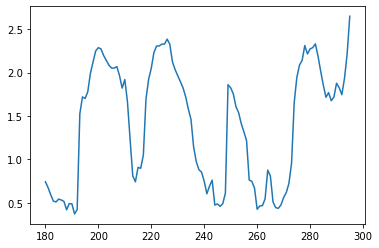

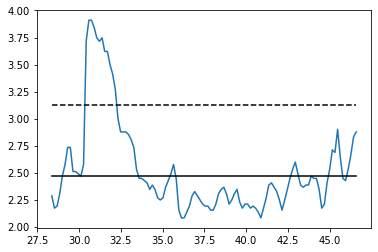

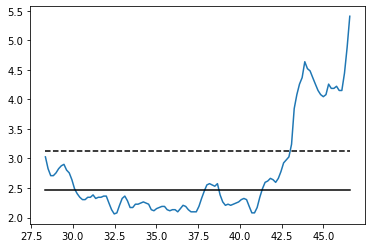

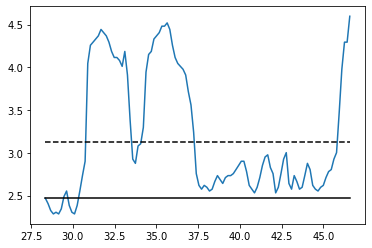

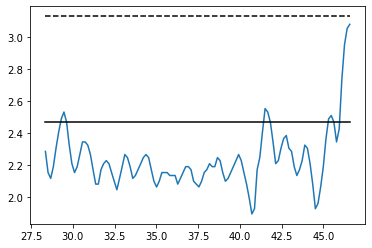

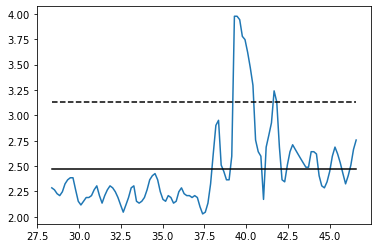

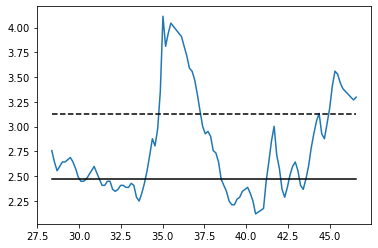

In [ ]:
# Extract and plot lambda_peak(time)
import analyze_r3d_functions as a3d
import analyze_timedep_functions as atf
import matplotlib.pyplot as plt
import numpy as np
import os

# TODO
# add real time x-axis to these
#
# compare with F2-plots and with F10-plots, or results on obscurations

# Set path settings
path = '../r3dresults/st28gm06n052_timedep_nospikes/'
modelabbreviation = '052'
#path = '../r3dresults/st28gm06n074_nospikes/'
#modelabbreviation = '074'
#path = '../r3dresults/st28gm06n075_nospikes/'
#modelabbreviation = '075'

# Extract list of folders from the path folder, and make them to numbers, and sort them!
phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
phases.sort()

# And load corresponding time
snapshot_times = np.loadtxt(path+'snapshot_yr.dat')[:,1]

# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Extract lambdapeak of average SED (and difference between that and std's max)
average_sed = np.loadtxt(f'{path}average_sed.dat')
lambda_peak_average = average_sed[np.argmax(average_sed[:,1]),0]
lambda_peak_std = np.abs(
    average_sed[np.argmax(average_sed[:,1]),0] - average_sed[np.argmax(average_sed[:,1]+average_sed[:,2]),0]
)
# Extract all lambda_peaks
lambda_peak = np.zeros((len(phases),len(angles)))
for nphase,phase in enumerate(phases):
    for nangle,angle in enumerate(angles):
        wavelength, spectrum = a3d.load_spectrum(
            path=f'{path}{phase}/spectrum_{angle}.out'
        )
        maxindex = np.argmax(spectrum)
        lambda_peak[nphase,nangle] = wavelength[maxindex]

# Save max-changes of lambdapeak
minmax = np.zeros(len(phases))
for nphase,phase in enumerate(phases):
    minmax[nphase] = np.max(lambda_peak[nphase,:]) - np.min(lambda_peak[nphase,:])
plt.figure(num='max differnce (due to angle) in lambda')
plt.plot(phases,minmax)



print(f'Total included time: {snapshot_times[-1] - snapshot_times[0]}')
print('Angle          Time ratio            Periods')
for nangle,angle in enumerate(angles):

    # Take out FFT of each direction of when curve is more than 1sigma from
    # average lambdapeak
    lambda_peak_major = np.zeros(len(phases))
    event_index = np.argwhere(lambda_peak[:,nangle] > lambda_peak_average+3*lambda_peak_std)
    lambda_peak_major[event_index] = lambda_peak[event_index,nangle]

    periods = atf.compute_period(
        signal=lambda_peak_major,
        timeaxis=snapshot_times
    )
    if np.sum(lambda_peak_major) != 0:
        event_ratio = len(event_index)/len(phases)
        print(f'{angle} :  {event_ratio}   {periods}')
    else:
        print(f'{angle} : N/A')

    # And plot lambdapeak(um) vs time directly, one plot per angle
    plt.figure(num=f'lambdapeak variations {angle}')
    plt.plot(snapshot_times,lambda_peak[:,nangle])
    # Plot average and average plus std-based lambdapeak
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [lambda_peak_average,lambda_peak_average],'k'
    )
    # Dashed line for 3x lambdapeak-std-based value
    plt.plot(
        [snapshot_times[0],snapshot_times[-1]],
        [lambda_peak_average+3*lambda_peak_std,lambda_peak_average+3*lambda_peak_std],'k--'
    )


In [1]:
# Translate Filterprofiles relevant from smith2002 suh2021 to my wavelengthgrid
import analyze_r3d_functions as a3d
import os

filterfolder = '../filterprofiles/'
filelist = os.listdir(filterfolder)


# Loop through files
for file in filelist:
    if file != 'wavelength_micron.inp':
        if file[:3] != 'r3d':
            a3d.translate_filter(
                filterpath=f'{filterfolder}{file}',
                wavelengthr3d=f'{filterfolder}wavelength_micron.inp'
            )



In [4]:
# Test run wavelength filter on a spectrum
import numpy as np

wavelengths = np.loadtxt(f'../r3dresults/st28gm06n052_timedep_nospikes/average_sed.dat')[:,0]
average = np.loadtxt(f'../r3dresults/st28gm06n052_timedep_nospikes/average_sed.dat')[:,1]

# Extract 2.2-wavelengthflux
nwave2p2um = np.argwhere(wavelengths >= 2.2)[0][0] -1
print(f'{average[nwave2p2um]} Jy at {wavelengths[nwave2p2um]} um')

# Extract filter-based 2.2-um-flux, 2MASS Kband
filterKband = np.loadtxt('../filterprofiles/r3d_2MASS.Ks_K2.2.dat')[:,1]
Kbandflux = np.trapz(filterKband  * average,wavelengths)
print(Kbandflux)







71487214.70328885 Jy at 2.189613737155 um
71093708.60470702


st28gm06n052
  Maximum   : 1.7270763568094711
  Average   : 1.9418910973816157
  Minimum   : 4.741980511010091

  Kmax-Wmin : 0.7472982938466739
  Kmin-Wmax : 5.721758573972888

  Std plus  : 1.3805180340372
  Std minus : 2.6849669643055467

st28gm06n074
  Maximum   : 1.5796993127184376
  Average   : 1.7037484342494498
  Minimum   : 4.1448493744277926

  Kmax-Wmin : 0.553049281065741
  Kmin-Wmax : 5.171499406080489

  Std plus  : 1.2508037548621402
  Std minus : 2.2401307078348065

st28gm06n075
  Maximum   : 1.3161317666966141
  Average   : 1.4155890479233193
  Minimum   : 1.6550559165287666

  Kmax-Wmin : 0.7572796254920444
  Kmin-Wmax : 2.2139080577333363

  Std plus  : 1.188032712286251
  Std minus : 1.6519107177386143

FK = FW when colour = 3.4878787878787882
FK > FW when colour < 3.4878787878787882
FK < FW when colour > 3.4878787878787882


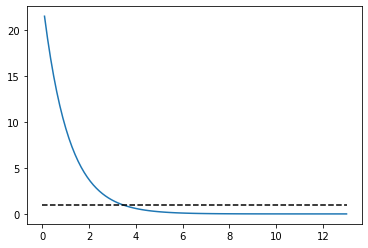

In [ ]:
# Extract "colour" of the models
#
# one for average SEDs
# one for max, one for min
# two for stds
# gives info on the spread of colours similar to Suh2021
#
import numpy as np
import matplotlib.pyplot as plt

# Define K and W3-band values
# wavelengths (um)
Kwave = 2.159
W3wave = 11.56
# reference fluxes (Jy)
Kfluxzero = 666.7
W3fluxzero = 28.3


modelfolders = [
    'st28gm06n052_timedep_nospikes',
    'st28gm06n074_nospikes',
    'st28gm06n075_nospikes'
]
models = [
    'st28gm06n052',
    'st28gm06n074',
    'st28gm06n075'
]
for nmodel in range(len(models)):
    print(models[nmodel])
    # Load average-sed-file
    allseds = np.loadtxt(f'../r3dresults/{modelfolders[nmodel]}/average_sed.dat')

    # Save time dep arrays in more useful names
    wavelengths = allseds[:,0]
    average = allseds[:,1]
    stdplus = allseds[:,1] + allseds[:,2]
    stdminus = allseds[:,1] - allseds[:,2]
    maximum = allseds[:,3]
    minimum = allseds[:,4]

    # Load appropiate filters
    Kbandfilter = np.loadtxt('../filterprofiles/r3d_2MASS.Ks_K2.2.dat')[:,1]
    W3bandfilter = np.loadtxt('../filterprofiles/r3d_WISE.W3_12.dat')[:,1]

    # Apply for each wavelength band and each level and integrate the flux density
    KaverageJY = np.trapz(Kbandfilter * average, wavelengths)
    KstdplusJY = np.trapz(Kbandfilter * stdplus, wavelengths)
    KstdminusJY = np.trapz(Kbandfilter * stdminus, wavelengths)
    KmaximumJY = np.trapz(Kbandfilter * maximum, wavelengths)
    KminimumJY = np.trapz(Kbandfilter * minimum, wavelengths)

    W3averageJY = np.trapz(W3bandfilter * average, wavelengths)
    W3stdplusJY = np.trapz(W3bandfilter * stdplus, wavelengths)
    W3stdminusJY = np.trapz(W3bandfilter * stdminus, wavelengths)
    W3maximumJY = np.trapz(W3bandfilter * maximum, wavelengths)
    W3minimumJY = np.trapz(W3bandfilter * minimum, wavelengths)

    # Compute magnitudes for the two wavelegth rehimes   TODO
    Kaverage = -2.5 * np.log10( KaverageJY /Kfluxzero)
    Kstdplus = -2.5 * np.log10( KstdplusJY /Kfluxzero)
    Kstdminus = -2.5 * np.log10(KstdminusJY/Kfluxzero)
    Kmaximum = -2.5 * np.log10( KmaximumJY /Kfluxzero)
    Kminimum = -2.5 * np.log10( KminimumJY /Kfluxzero)

    W3average = -2.5 * np.log10( W3averageJY /W3fluxzero)
    W3stdplus = -2.5 * np.log10( W3stdplusJY /W3fluxzero)
    W3stdminus = -2.5 * np.log10(W3stdminusJY/W3fluxzero)
    W3maximum = -2.5 * np.log10( W3maximumJY /W3fluxzero)
    W3minimum = -2.5 * np.log10( W3minimumJY /W3fluxzero)

    colour_average = Kaverage - W3average
    colour_stdplus = Kstdplus - W3stdminus
    colour_stdminus = Kstdminus - W3stdplus
    colour_maximum = Kmaximum - W3maximum
    colour_minimum = Kminimum - W3minimum
    colour_KmaxWmin = Kmaximum - W3minimum
    colour_KminWmax = Kminimum - W3maximum

    print(f'  Average   : {colour_average}')
    #print(f'      Std   : {0.5*(colour_average-colour_stdplus + colour_stdminus-colour_average)}')
    print('')
    print(f'  Maximum   : {colour_maximum}')
    print(f'  Minimum   : {colour_minimum}')
    print('')
    print(f'  Kmax-Wmin : {colour_KmaxWmin}')
    print(f'  Kmin-Wmax : {colour_KminWmax}')
    print('')
    print(f'  Std plus  : {colour_stdplus}')
    print(f'  Std minus : {colour_stdminus}')
    print('')

    # testplot
#    plt.figure(nmodel)
#    plt.plot(wavelengths,average)
#    plt.plot(wavelengths,stdplus,'--')
#    plt.plot(wavelengths,stdminus,'--')
#    plt.plot(wavelengths,maximum,':')
#    plt.plot(wavelengths,minimum,':')
#    plt.xscale('log')
#    plt.yscale('log')
#    plt.xlim(0.5,40)
#    plt.ylim(1e5,2e8)


# Plot beahviour of colour in terms of flux density ratio

colour = np.linspace(0.1,13,100)
plt.plot(
    colour,
    Kfluxzero/W3fluxzero*10**(-colour/2.5)
)
plt.plot(
    [0,13],
    [1,1],'k--'
)

onepoint = np.argwhere(Kfluxzero/W3fluxzero*10**(-colour/2.5) <= 1)[0][0]
print(f'FK = FW when colour = {colour[onepoint]}')
print(f'FK > FW when colour < {colour[onepoint]}')
print(f'FK < FW when colour > {colour[onepoint]}')






In [ ]:
# Extract flux densities of models for comparison with source specific data
# Ie
#
# aavso.org     smith2002     smith2002
# Vband         cobe-dirbe    cobe-dirbe
# 0.5556um      2.2um         3.5um
#
# Vband/visual is from various telescopes, lets keep that as is, ie just the data
# at exactly that wavelength.
# and use the rest from filtered data.
import numpy as np


modelfolders = [
    'st28gm06n052_timedep_nospikes',
    'st28gm06n074_nospikes',
    'st28gm06n075_nospikes'
]
models = [
    'st28gm06n052',
    'st28gm06n074',
    'st28gm06n075'
]
for nmodel in range(len(models)):
    # Load average-sed-file
    allseds = np.loadtxt(f'../r3dresults/{modelfolders[nmodel]}/average_sed.dat')

    # Save time dep arrays in more useful names
    wavelengths = allseds[:,0]
    average = allseds[:,1]
    minimum = allseds[:,4]

    # Load appropiate filters
    # r3d_COBE_DIRBE.2p2m.dat
    # r3d_COBE_DIRBE.3p5m.dat
    cobe2p2_filter = np.loadtxt('../filterprofiles/r3d_COBE_DIRBE.2p2m.dat')[:,1]
    cobe3p5_filter = np.loadtxt('../filterprofiles/r3d_COBE_DIRBE.3p5m.dat')[:,1]

    # Apply for each wavelength band and each level and integrate the flux density
    cobe2p2_average = np.trapz(cobe2p2_filter * average, wavelengths)
    cobe2p2_min = np.trapz(cobe2p2_filter * minimum, wavelengths)

    cobe3p5_average = np.trapz(cobe3p5_filter * average, wavelengths)
    cobe3p5_min = np.trapz(cobe3p5_filter * minimum, wavelengths)

    # Also extract fluxes and ratio at Vband, 0.5556um
    nwave_Vband = np.argwhere(wavelengths >= 0.5556)[0][0] - 1
    vband_average = average[nwave_Vband]
    vband_min = minimum[nwave_Vband]

    # Print
    print(f'{models[nmodel]}: minimum/average')
    print(f'      Vband : {vband_min} / {vband_average} = {vband_min/vband_average}')
    print(f'  COBE[2.2] : {cobe2p2_min} / {cobe2p2_average} = {cobe2p2_min/cobe2p2_average}')
    print(f'  COBE[3.5] : {cobe3p5_min} / {cobe3p5_average} = {cobe3p5_min/cobe3p5_average}')
    print('')




st28gm06n052
st28gm06n052: minimum/average
      Vband : 2270.3581756129993 / 2525517.386228667 = 0.0008989675493793789
  COBE[2.2] : 3561392.1957586873 / 71631160.59027615 = 0.04971847679712371
  COBE[3.5] : 13628817.75154429 / 66726329.31313842 = 0.20424947530960277

st28gm06n074
st28gm06n074: minimum/average
      Vband : 9690.463392944 / 2866405.1622983627 = 0.0033807026028288057
  COBE[2.2] : 5171485.887070388 / 83380851.23105927 = 0.06202246451933577
  COBE[3.5] : 16942138.181830786 / 73083583.24308887 = 0.2318186578985632

st28gm06n075
st28gm06n075: minimum/average
      Vband : 227930.45254799994 / 3864153.52898719 = 0.05898586866131621
  COBE[2.2] : 57975858.47997972 / 96436526.18542948 = 0.6011815312437006
  COBE[3.5] : 55162361.15935599 / 79176861.77245198 = 0.6966979989417645



Total number in IRAS: 4037.0
  st28gm06n052: 848.0 (21.00569729997523 proc)
  st28gm06n074: 1106.0 (27.396581620014864 proc)
  st28gm06n075: 3380.0 (83.72553876641071 proc)
Total number in WISE: 5252.0
  st28gm06n052: 43.0 (0.8187357197258188 proc)
  st28gm06n074: 71.0 (1.351865955826352 proc)
  st28gm06n075: 1427.0 (27.17060167555217 proc)


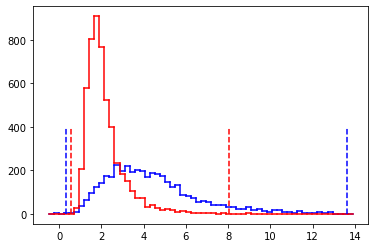

In [ ]:
# Testplot histograms from Suh2021
# and check for how many/portion of stars are above the model's
# most red limits
import matplotlib.pyplot as plt

catnames =[
    'IRAS',
    'WISE'
]
catcolours = ['b','r']
catfiles = [
    '../paper2/suh21_histdata/oagb_iras-k-w3_data.csv',
    '../paper2/suh21_histdata/oagb_wise-k-w3_data.csv'
]
catredlimits = [
    13.6,   # iras max
    8.02,   # wise max
]
# Models
modelnames = [
    'st28gm06n052',
    'st28gm06n074',
    'st28gm06n075',
]
modelredlimits = [
    5.722,
    5.171,
    2.214,
]

for catname,catfile,catcolour,catredlimit in zip(catnames,catfiles,catcolours,catredlimits):

    startnumb = []
    endnumb = []
    starnumb = []
    totalnumbstars = 0

    with open(catfile, 'r') as Fcat:
        for line in Fcat.readlines():
            if line[0] != 'B':
                linesplit = line.split(',')
                startnumb.append(float(linesplit[0]))
                endnumb.append(float(linesplit[1]))
                starnumb.append(float(linesplit[2]))

    # Plot all and sum upp total number of stars
    for nn in range(len(starnumb)):
        totalnumbstars += starnumb[nn]
        if nn == 0:
            plt.plot(
                [startnumb[nn],startnumb[nn]],
                [0,starnumb[nn]],catcolour
            )
            plt.plot(
                [startnumb[nn],endnumb[nn]],
                [starnumb[nn],starnumb[nn]],catcolour
            )
        else:
            plt.plot(
                [startnumb[nn],startnumb[nn]],
                [starnumb[nn-1],starnumb[nn]],catcolour
            )
            plt.plot(
                [startnumb[nn],endnumb[nn]],
                [starnumb[nn],starnumb[nn]],catcolour
            )
    # Check how many stars are within or outside my model ranges
    print(
        f'Total number in {catname}: {totalnumbstars}'
    )
    for modelredlimit,modelname in zip(modelredlimits,modelnames):
        totalredstars = 0
        for nn in range(len(starnumb)):
            if startnumb[nn] >= modelredlimit and endnumb[nn] <= catredlimit:
                totalredstars += starnumb[nn]
        print(f'  {modelname}: {totalredstars} ({totalredstars/totalnumbstars*100} proc)')

# Plot minmax-values

# Wise
plt.plot(
    [0.58,0.58],
    [0,400],
    'r--'
)
plt.plot(
    [8.02,8.02],
    [0,400],
    'r--'
)
# Iras
plt.plot(
    [0.34,0.34],
    [0,400],
    'b--'
)
plt.plot(
    [13.6,13.6],
    [0,400],
    'b--'
)






In [5]:
type(line[0])


str

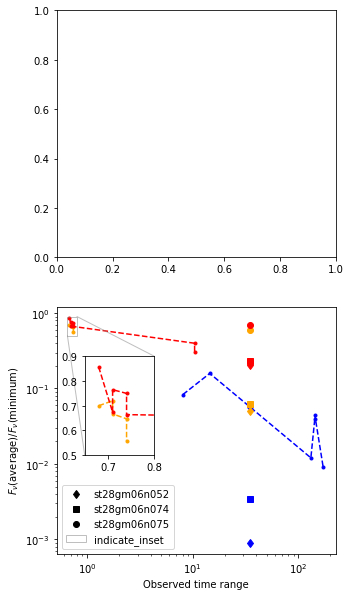

In [7]:
# Testplot figure with colours and flux-ratios compared to data
#
# fluxratioploten
# yaxel: flux ratio i log
# xaxeln: obstid
# olika symboler för olika källor, linjer mellan källorna, ensamma punkter för modeller
import numpy as np
import matplotlib.pyplot as plt

# each row: model
# each column: Vband, Cobe2.2, Cobe3.5
modeltime =  34.857
modelfluxratios = np.array([
    [0.00089898,0.04972 , 0.20425],
    [0.0033807 ,0.06202 , 0.23182],
    [0.058986  ,0.60118 , 0.69670],
])
modelnames = [
    'st28gm06n052',
    'st28gm06n074',
    'st28gm06n075',
]

# Save all band data separately
visualdata = np.array([
    [  8.06 ,0.083179  ],
    [ 14.47 ,0.15850   ],
    [131.18 ,0.012023  ],
    [143.96 ,0.044055  ],
    [144.73 ,0.039811  ],
    [171.37 ,0.0091201 ],
])
Kbanddata = np.array([
    [0.68 , 0.700],
    [0.71 , 0.720],
    [0.71 , 0.667],
    [0.74 , 0.647],
    [0.74 , 0.558],
])
W1banddata = np.array([
    [ 0.68, 0.857  ],
    [ 0.71, 0.674  ],
    [ 0.71, 0.765  ],
    [ 0.74, 0.75   ],
    [ 0.74, 0.664  ],
    [10.4 , 0.39810],
    [10.4 , 0.30199],
])
allobsdata = [
    visualdata,
    Kbanddata,
    W1banddata
]
# Save all band data in one master array for a "master line"
# take average of those at "same" time to change weighting
alldata = np.array([
    [0.68 , 0.700],
    [0.68 , 0.857],
    [0.71 , 0.667],
    [0.71 , 0.674],
    [0.71 , 0.720],
    [0.71 , 0.765],
    [0.74 , 0.558],
    [0.74 , 0.647],
    [0.74 , 0.664],
    [0.74 , 0.75 ],
    [  8.06 ,0.083179  ],
    [10.4 , 0.30199 ],
    [10.4 , 0.39810 ],
    [ 14.47 ,0.15850   ],
    [131.18 ,0.012023  ],
    [143.96 ,0.044055  ],
    [144.73 ,0.039811  ],
    [171.37 ,0.0091201 ],
])
# Line based on averages at the two extremes
#averagex = [
#    0.1 *(2*0.68 + 4*0.71 + 4*0.74),
#    0.25*(131.18 + 143.96 + 144.73 + 171.37)
#]
#averagey = [
#    0.1*(0.700 + 0.857 + 0.667 + 0.674 + 0.720 + 0.765 + 0.558 + 0.647 + 0.664 + 0.75),
#    0.25*(0.012023 + 0.044055 + 0.039811 + 0.0091201)
#]
#plt.plot(averagex,averagey,'k:')

fig,ax = plt.subplots(
    2,1,
    figsize=(5,10)
)
axin = ax[1].inset_axes(
    bounds=[0.1,0.4,0.25,0.4]
)


wavecolour = ['b','orange','r']
modelsymbol = ['d','s','o']

#ax[1].plot(alldata[:,0],alldata[:,1],'k:')
#axin.plot(alldata[:,0],alldata[:,1],'k:')

for nwave,obsdata in enumerate(allobsdata):

    obstime = obsdata[:,0]
    fluxratios = obsdata[:,1]


    # polyfit en linje per våglängdsområde?
    #pcoeffs = np.polyfit(
    #    obstime,
    #    fluxratios,
    #    deg=2
    #)
    #polyliney = [
    #    pcoeffs[0]*obstime[0]**2 + pcoeffs[1]*obstime[0] + pcoeffs[2],
    #    pcoeffs[0]*obstime[-1]**2 + pcoeffs[1]*obstime[-1] + pcoeffs[2],
    #]

    ax[1].plot(obstime,fluxratios,'.',color=wavecolour[nwave])
    ax[1].plot(obstime,fluxratios,'--',color=wavecolour[nwave])
    axin.plot(obstime,fluxratios,'.',color=wavecolour[nwave])
    axin.plot(obstime,fluxratios,'--',color=wavecolour[nwave])

    #plt.plot([obstime[0],obstime[-1]],polyliney,color=wavecolour[nwave])


    # Plot model results
    for nmodel in range(3):
        ax[1].plot(modeltime,modelfluxratios[nmodel,nwave],modelsymbol[nmodel],color=wavecolour[nwave])
        axin.plot(modeltime,modelfluxratios[nmodel,nwave],modelsymbol[nmodel],color=wavecolour[nwave])


# Add model labels
for nmodel,modelname in enumerate(modelnames):
    ax[1].plot(-1,-1,modelsymbol[nmodel],color='k',markersize=6,label=modelname)




ax[1].set_xscale('log')
ax[1].set_yscale('log')
axin.set_xlim(0.65,0.8)
axin.set_ylim(0.5,0.9)
ax[1].indicate_inset_zoom(axin);
ax[1].set_xlabel('Observed time range')
ax[1].set_ylabel(r'$F_\nu ($average$)/F_\nu ($minimum$)$')
ax[1].legend(
    #loc='upper right',
    fontsize=10
)


#plt.xlim(0.6,0.8)
#plt.ylim(0.6,0.8)

# 



(0, 4)

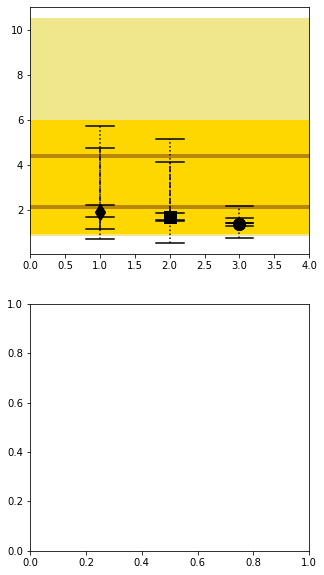

In [ ]:
import matplotlib.pyplot as plt

# Test plot panel with colours
#
#                Suh+2021 
#                fig9 IRAS      fig9 WISE
#               K[2.2]-W3[12]   K[2.2]-W3[12]    n052       n074        n075
#   maxK-minW3:  -               -               0.747      0.553       0.757
#          Max: 0.9             1                1.727      1.580       1.317
#          STD: 2.18            0.91             0.313      0.187       0.041
#        Medel: 4.39            2.15             1.942      1.704       1.416
#          STD: 2.18            0.91             0.313      0.187       0.041
#          Min: 10-11           6                4.742      4.145       1.655
#   minK-maxW3:  -               -               5.722      5.171       2.214
#
# xaxeln: modellerna
modelnames = [
    'st28gm06n052',
    'st28gm06n074',
    'st28gm06n075',
]
modelsymbol = [
    'd','s','o'
]
# Y-axel, div färger
# modellerna med "error-bar-aktiga" linjer

# Y-axis with model data in errorbar like
# max-min, max, avr+std, avr, avr-std, min, min-max
# 052,074,075
modeldata = [
    [
        0.747 ,  1.727 , 1.942+0.313 , 1.942 , 1.492-0.313 , 4.742 , 5.722
    ],
    [
        0.553 , 1.580 , 1.704+0.187 , 1.704 , 1.704-0.187 , 4.145 , 5.171 
    ],
    [
        0.757 , 1.317 , 1.416+0.041 , 1.416 , 1.416+0.041 , 1.655 , 2.214
    ]
]
linestyles = [
    ':','--','-'
]
# Set up figure object
fig,ax = plt.subplots(
    2,1,
    figsize=(5,10)
)
# Plot fields for observed statistics from Suh21
#
# From Fig9, 2 right panels two catalogues, 
#   first IRAScat-minmax
#   then  WISEcat-minmax
#   In middle, first: IRAS-mean, second: WISE-mean
suhdata = [
    0.9,
    1,
    4.39,
    2.15,
    6,
    10.5,
]
suhcolours = [
    'khaki','gold','darkgoldenrod','red'
]
modelaxis = [0,4]
for nfield in range(4):
    if nfield < 2:
        ax[0].fill_between(
            modelaxis,
            [suhdata[nfield],suhdata[nfield]],
            [suhdata[-nfield-1],suhdata[-nfield-1]],
            color=suhcolours[nfield]
        )
    if nfield > 1:
        ax[0].plot(
            modelaxis,
            [suhdata[nfield],suhdata[nfield]],
            color=suhcolours[2],linewidth=4
        )    


# Plot model colour ranges
for nmodel,modeldat in enumerate(modeldata):
    # error bars
    for nn in range(3):
        ax[0].plot(
            [nmodel+1,nmodel+1],
            [modeldat[nn],modeldat[-nn-1]],
            'k',linestyle=linestyles[nn]
        )
        ax[0].plot(
            [nmodel+0.8,nmodel+1.2],
            [modeldat[nn],modeldat[nn]],
            'k'
        )
        ax[0].plot(
            [nmodel+0.8,nmodel+1.2],
            [modeldat[-nn-1],modeldat[-nn-1]],
            'k'
        )
    ax[0].plot(
        [nmodel+1,nmodel+1],
        [modeldat[3],modeldat[3]],
        modelsymbol[nmodel],color='k',markersize=12
    )

ax[0].set_xlim(0,4)



### Extract main source size

In [1]:
# Extract and save time-angle-dependent source-size at various lambda
import analyze_timedep_functions as atf
import numpy as np
import os

# Template size of all stars
Rstar = 1.65
# Chose model
models = [
    'st28gm06n052_timedep_nospikes',
    #'st28gm06n052_timedep_nodust',
    'st28gm06n074_nospikes',
    #'st28gm06n074_nodust',
    'st28gm06n075_nospikes',
    #'st28gm06n075_nodust'
]
# Chose wavelength (in um)
wavelengths = [
    #'01',
    '02',
    '10',
]
# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
for modelname in models:
    for wavelength in wavelengths:

        # Extract list of folders from the path folder, and make them to numbers, and sort them!
        path = f'../r3dresults/{modelname}/'
        phases = [int(filename) for filename in os.listdir(path) if os.path.isdir(path+filename)]
        phases.sort()

        # Run extractor and save data
        atf.extract_sourcesize(
            path=path,
            phases=phases,
            angles=angles,
            wavelength=wavelength,
            save_datafile='y'
        )
        # Load and check the time-average size of the time-depdendant LOS-averaged size
        average_radii = np.loadtxt(f'../r3dresults/{modelname}/source_radius_{wavelength}um.dat')[:,1]
        average_radius = np.mean(average_radii)
        print(
            f'{modelname} radius at {wavelength} um: {average_radius} au. Ratio: {average_radius/Rstar}'
        )
        os.system(
            'spd-say moo'
        )
        # Empty line
        print(
            ''
        )





extract_sourcesize: Done
  Output written to ../r3dresults/st28gm06n052_timedep_nospikes/source_radius_02um.dat
st28gm06n052_timedep_nospikes radius at 02 um: 1.2251333484162894 au. Ratio: 0.742505059646236

extract_sourcesize: Done
  Output written to ../r3dresults/st28gm06n052_timedep_nospikes/source_radius_10um.dat
st28gm06n052_timedep_nospikes radius at 10 um: 1.2562538009049773 au. Ratio: 0.7613659399424105

extract_sourcesize: Done
  Output written to ../r3dresults/st28gm06n074_nospikes/source_radius_02um.dat
st28gm06n074_nospikes radius at 02 um: 1.4134196832579182 au. Ratio: 0.8566179898532839

extract_sourcesize: Done
  Output written to ../r3dresults/st28gm06n074_nospikes/source_radius_10um.dat
st28gm06n074_nospikes radius at 10 um: 1.4083635294117647 au. Ratio: 0.8535536541889484

extract_sourcesize: Done
  Output written to ../r3dresults/st28gm06n075_nospikes/source_radius_02um.dat
st28gm06n075_nospikes radius at 02 um: 1.6310965158371038 au. Ratio: 0.9885433429315781

extr

In [ ]:
# Print average flux density of nodust-data at each wavelength
# - to use to define fluxlimit in size-extractor
import numpy as np

paths = [
    '../r3dresults/st28gm06n052_timedep_nodust/average_sed.dat',
    '../r3dresults/st28gm06n074_nodust/average_sed.dat',
    '../r3dresults/st28gm06n075_nodust/average_sed.dat',
]
average_onemicron = 0
average_twomicron = 0
average_tenmicron = 0

for path in paths:

    wavelengths = np.loadtxt(path)[:,0]
    average_sed = np.loadtxt(path)[:,1]

    onemicron = np.where(wavelengths >= 1 )[0][0]
    twomicron = np.where(wavelengths >= 2 )[0][0]
    tenmicron = np.where(wavelengths >= 10)[0][0]

    average_onemicron += average_sed[onemicron]
    average_twomicron += average_sed[twomicron]
    average_tenmicron += average_sed[tenmicron]

    print(path.split('/')[-2])
    print(f'{wavelengths[onemicron]} um: {average_sed[onemicron]} Jy')
    print(f'{wavelengths[twomicron]} um: {average_sed[twomicron]} Jy')
    print(f'{wavelengths[tenmicron]} um: {average_sed[tenmicron]} Jy')
    print('')

average_onemicron /= len(paths)
average_twomicron /= len(paths)
average_tenmicron /= len(paths)

print('average_nodust')
print(f'{wavelengths[onemicron]} um: {average_onemicron} Jy')
print(f'{wavelengths[twomicron]} um: {average_twomicron} Jy')
print(f'{wavelengths[tenmicron]} um: {average_tenmicron} Jy')




st28gm06n052_timedep_nodust
1.00791589806 um: 42451806.19613231 Jy
2.010669926771 um: 97223628.13918304 Jy
10.07270043879 um: 20496420.35404154 Jy

st28gm06n074_nodust
1.00791589806 um: 42405880.05171331 Jy
2.010669926771 um: 97418618.79073843 Jy
10.07270043879 um: 20609549.741299596 Jy

st28gm06n075_nodust
1.00791589806 um: 42223897.16277945 Jy
2.010669926771 um: 97123325.49826032 Jy
10.07270043879 um: 20537622.784469306 Jy

average_nodust
1.00791589806 um: 42360527.80354169 Jy
2.010669926771 um: 97255190.80939393 Jy
10.07270043879 um: 20547864.293270145 Jy


In [3]:
# Separately load and check the "correctedness" of average of average radii of each model
import numpy as np

# Template size of all stars
Rstar = 1.65
# Chose model
models = [
    'st28gm06n052_timedep_nospikes',
    #'st28gm06n052_timedep_nodust',
    'st28gm06n074_nospikes',
    #'st28gm06n074_nodust',
    'st28gm06n075_nospikes',
    #'st28gm06n075_nodust'
]
# Chose wavelength (in um)
wavelengths = [
    '01',
    '02',
    '10'
]
for modelname in models:
    for wavelength in wavelengths:
        average_radii = np.loadtxt(f'../r3dresults/{modelname}/source_radius_{wavelength}um.dat')[:,1]
        average_radius = np.mean(average_radii)
        print(f'{modelname} radius at {wavelength} um: {average_radius} au. Ratio: {average_radius/Rstar}')
    print('')




st28gm06n052_timedep_nospikes radius at 01 um: 1.1356835746606335 au. Ratio: 0.6882930755518991
st28gm06n052_timedep_nospikes radius at 02 um: 1.2251333484162894 au. Ratio: 0.742505059646236
st28gm06n052_timedep_nospikes radius at 10 um: 1.2562538009049773 au. Ratio: 0.7613659399424105

st28gm06n074_nospikes radius at 01 um: 1.312903257918552 au. Ratio: 0.7956989441930619
st28gm06n074_nospikes radius at 02 um: 1.4134196832579182 au. Ratio: 0.8566179898532839
st28gm06n074_nospikes radius at 10 um: 1.4083635294117647 au. Ratio: 0.8535536541889484

st28gm06n075_nospikes radius at 01 um: 1.5836335746606336 au. Ratio: 0.9597779240367477
st28gm06n075_nospikes radius at 02 um: 1.6310965158371038 au. Ratio: 0.9885433429315781
st28gm06n075_nospikes radius at 10 um: 1.6149154751131223 au. Ratio: 0.9787366515837105



052_nodust at 10um: r3d-radius / co5bold-radius = 1.0059
074_nodust at 10um: r3d-radius / co5bold-radius = 1.0075
075_nodust at 10um: r3d-radius / co5bold-radius = 1.0058


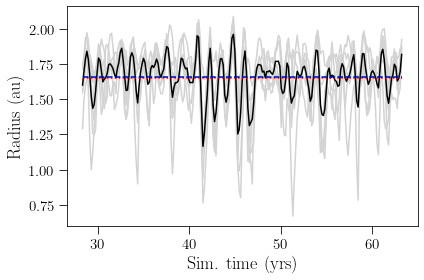

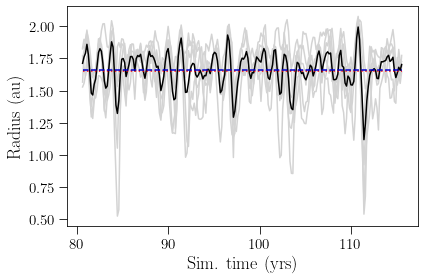

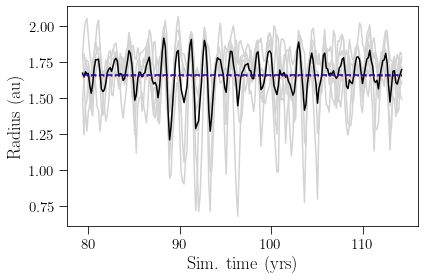

In [3]:
# Plot data on source radii as saved in cell above.
import matplotlib.pyplot as plt
import numpy as np
# Figure settings
from matplotlib import rc
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

# Chose model
models = [
    #'st28gm06n052_timedep_nospikes',
    'st28gm06n052_timedep_nodust',
    #'st28gm06n074_nospikes',
    'st28gm06n074_nodust',
    #'st28gm06n075_nospikes',
    'st28gm06n075_nodust'
]
modelnumbs = [
    #'052',
    '052_nodust',
    #'074',
    '074_nodust',
    #'075',
    '075_nodust',
]
# Chose wavelength (in um)
wavelengths = [
    #'01',
    #'02',
    '10'
]
# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Plot all
for modelname,modelnumb in zip(models,modelnumbs):
    for wavelength in wavelengths:
        
        path = f'../r3dresults/{modelname}/'

        # Load and plot radii vs time
        source_radii = np.loadtxt(f'{path}/source_radius_{wavelength}um.dat')

        # Load corresponding time
        snapshot_times = np.loadtxt(path+'snapshot_yr.dat')[:,1]

        # Set figure object
        fig, ax = plt.figure(figsize=(6, 4)), plt.axes()
        ax.set_ylabel(r'Radius (au)', fontsize=18)
        ax.set_xlabel(r'Sim. time (yrs)',fontsize=18)
        ax.tick_params(axis='both', which='major', labelsize=15)
        #ax.set_title(f'{modelnumb}: {wavelength}')

        # First plot angles
        for nangle in range(len(angles)):
            ax.plot(snapshot_times,source_radii[:,nangle+2],'lightgrey')
        # Then angle-averaged
        ax.plot(snapshot_times,source_radii[:,1],'k')

        # Plot "table radius" and average radius
        Rstar = 1.65
        source_radii_average = np.mean(source_radii[:,1])
        ax.plot(
            [snapshot_times[0],snapshot_times[-1]],
            [Rstar,Rstar],'r:'
        )
        ax.plot(
            [snapshot_times[0],snapshot_times[-1]],
            [source_radii_average,source_radii_average],'--',color='mediumblue'
        )
        ax.grid(
            visible=False,
            which='both',
            axis='x'
        )
        fig.tight_layout()
        # Save figure
        fig.savefig(f'../r3dplots/{modelnumb}_sourceradius_{wavelength}um.pdf', dpi=300, facecolor="white")

        # Print some interesting output
        print(f'{modelnumb} at {wavelength}um: r3d-radius / co5bold-radius = {source_radii_average/Rstar:.4f}')

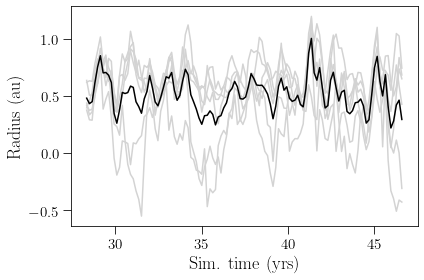

In [ ]:
# OLD TEMP FOR PAPER
# Plot Rsource minus Rstar for 2um -> negative values : obscured star, positive: enlarged
import matplotlib.pyplot as plt
import numpy as np
# Figure settings
from matplotlib import rc
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

# Chose model
models = [
    'st28gm06n052_timedep_nospikes',
    #'st28gm06n052_timedep_nodust',
    #'st28gm06n074_nospikes',
    #'st28gm06n074_nodust',
    #'st28gm06n075_nospikes',
    #'st28gm06n075_nodust'
]
modelnumbs = [
    '052',
    #'052_nodust',
    #'074',
    #'074_nodust',
    #'075',
    #'075_nodust',
]
# Chose wavelength (in um)
wavelength = '02'

# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]

# TODO
# städa den här koden!

# Plot all
for modelname,modelnumb in zip(models,modelnumbs):
    
    path = f'../r3dresults/{modelname}/'

    # Load source radius
    source_radii = np.loadtxt(f'{path}/source_radius_{wavelength}um.dat')

    # Load star radius
    star_radii = np.loadtxt(f'../r3dresults/st28gm06n{modelnumb}_timedep_nodust/source_radius_01um.dat')

    # Load corresponding time
    snapshot_times = np.loadtxt(path+'snapshot_yr.dat')[:,1]

    # Declare difference-array
    source_diff = np.zeros((len(snapshot_times),len(angles)))

    # Set figure object
    fig, ax = plt.figure(figsize=(6, 4)), plt.axes()
    ax.set_ylabel(r'Radius (au)', fontsize=18)
    ax.set_xlabel(r'Sim. time (yrs)',fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=15)

    # Subtract sizes
    for nangle in range(len(angles)):
        source_diff[:,nangle] = source_radii[:,nangle+2] - star_radii[:,nangle+2] 

        # and plot
        ax.plot(snapshot_times,source_diff[:,nangle],'lightgrey')
    
    # Then angle-averaged
    source_diff_average = np.zeros(len(snapshot_times))
    for nphase in range(len(snapshot_times)):
        source_diff_average[nphase] = np.mean(source_diff[nphase,:])

    
    ax.plot(snapshot_times,source_diff_average,'k')

    #ax.grid(
    #    visible=False,
    #    which='both',
    #    axis='x'
    #)
    fig.tight_layout()
    # Save figure
    #fig.savefig(f'../r3dplots/{modelnumb}_radiusdiff_{wavelength}um.pdf', dpi=300, facecolor="white")





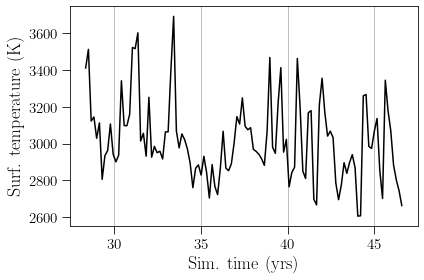

In [3]:
# Plot average temperature of spherical shell around Rsource
# Extract with atf.extract_surfacetemp()
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

# Figure settings
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

path = '../r3dresults/st28gm06n052_timedep_nodust/'

# Load temperature and snapshot times
snapshot_times = np.loadtxt(path+'snapshot_yr.dat')[:,1]
surface_temperatures = np.loadtxt(path+'surface_temperature.dat')[:,1]

fig, ax = plt.figure(), plt.axes()
ax.plot(snapshot_times,surface_temperatures,'k')

ax.set_xlabel(r'Sim. time (yrs)',fontsize=18);
ax.set_ylabel(r'Surf. temperature (K)',fontsize=18);
ax.tick_params(
    axis='both', 
    which='major', 
    labelsize=15
)
ax.grid(
    visible=True,
    which='both',
    axis='x'
)

fig.tight_layout()
fig.savefig(
    f'/home/joachim/exwings/r3dplots/20241023_tillBT/052_nodust_surfacetemperature.pdf',
    dpi=300,
    facecolor='white'
)





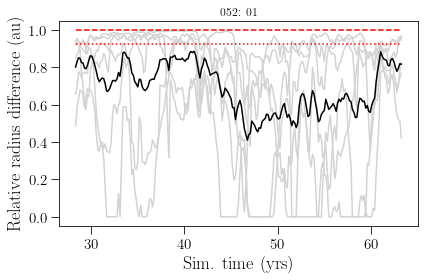

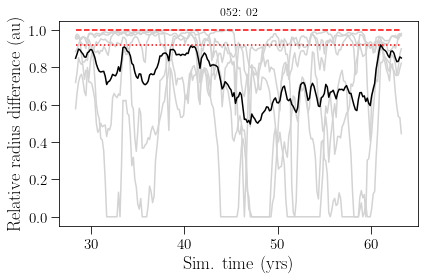

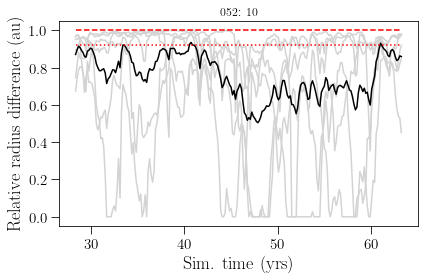

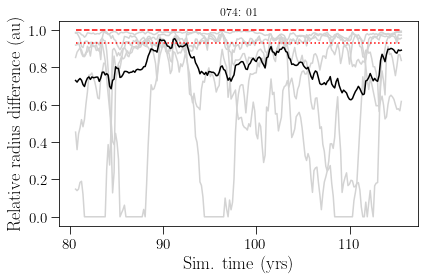

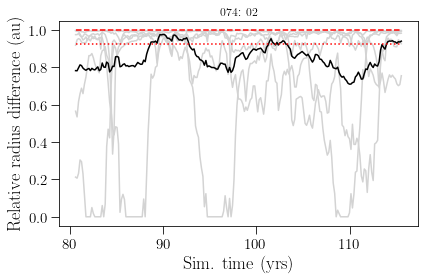

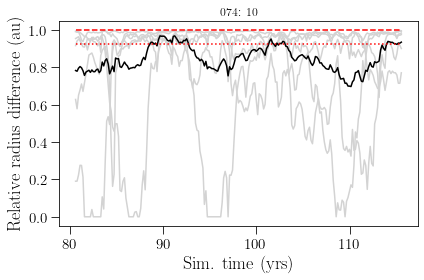

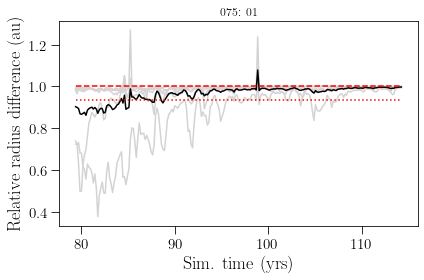

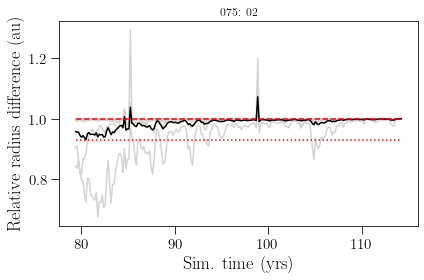

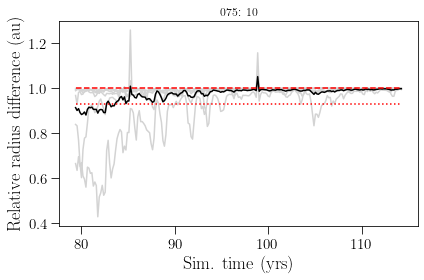

In [3]:
# Plot normalised comparison of source size and stellar size
import matplotlib.pyplot as plt
import numpy as np
# Figure settings
from matplotlib import rc
rc('font',**{'family':'serif','serif':['serif']})
rc('text', usetex=True)
rc('xtick.major',size=8)
rc('xtick.minor',size=4)
rc('ytick.major',size=8)
rc('ytick.minor',size=4)

# Chose model
models = [
    'st28gm06n052_timedep',
    'st28gm06n074',
    'st28gm06n075'
]
modelnumbs = [
    '052',
    '074',
    '075',
]
# Chose wavelength (in um)
wavelengths = [
    '01',
    '02',
    '10'
]
# Set LOS-angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
# Plot all
for modelname,modelnumb in zip(models,modelnumbs):
    for wavelength in wavelengths:
        
        path = f'../r3dresults/{modelname}_nospikes/'
        path_nodust = f'../r3dresults/{modelname}_nodust/'

        # Load all radii
        source_radii = np.loadtxt(f'{path}/source_radius_{wavelength}um.dat')[:,1:]
        star_radii = np.loadtxt(f'{path_nodust}/source_radius_{wavelength}um.dat')[:,1:]

        # Load corresponding time
        snapshot_times = np.loadtxt(path+'snapshot_yr.dat')[:,1]

        # Compute star-normalised radii
        normalised_radii = source_radii/star_radii
        normalised_std = np.std(star_radii[:,0])/np.average(star_radii[:,0])

        # Set figure object
        fig, ax = plt.figure(figsize=(6, 4)), plt.axes()
        ax.set_ylabel(r'Relative radius difference (au)', fontsize=18)
        ax.set_xlabel(r'Sim. time (yrs)',fontsize=18)
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.set_title(f'{modelnumb}: {wavelength}')

        # First plot angles
        for nangle in range(len(angles)):
            ax.plot(snapshot_times,normalised_radii[:,nangle+1],'lightgrey')
        # Then angle-averaged
        ax.plot(snapshot_times,normalised_radii[:,0],'k')

        # Plot average stellar radius and STD of stellar radius, or so...
        # Stellar radius
        ax.plot(
            [snapshot_times[0],snapshot_times[-1]],
            [1,1],'r--'
        )
        ax.plot(
            [snapshot_times[0],snapshot_times[-1]],
            [1-normalised_std,1-normalised_std],'r:'
        )
        fig.tight_layout()




#### Measure source size events

i000_phi000
  FFT: [34.85688584 11.61896195  1.51551678  1.45237024]
  Total included time: 34.85688583615784 time units
  Number of events: 1
  Average pediod between events: 34.85688583615784 time units
  Total length of events: 0.158437231328179 time units
  Average length of events: 0.158437231328179 time units
  Portion of events: 0.004545363922437054

i090_phi000
  FFT: [17.42844292  3.87298732 11.61896195  1.5844039 ]
  Total included time: 34.85688583615784 time units
  Number of events: 3
  Average pediod between events: 11.618961945385948 time units
  Total length of events: 0.475311693984537 time units
  Average length of events: 0.158437231328179 time units
  Portion of events: 0.01363609176731116

i090_phi090
  FFT: [ 2.32379239 11.61896195  3.87298732 34.85688584]
  Total included time: 34.85688583615784 time units
  Number of events: 1
  Average pediod between events: 34.85688583615784 time units
  Total length of events: 0.158437231328179 time units
  Average length of 

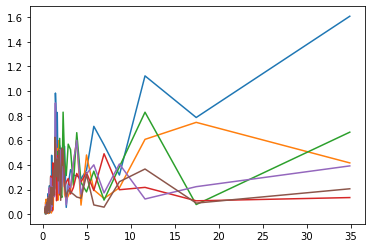

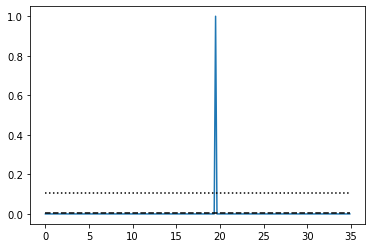

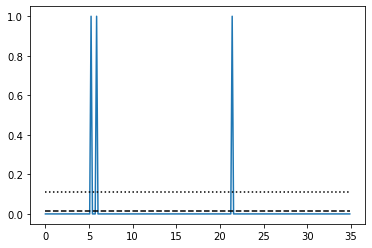

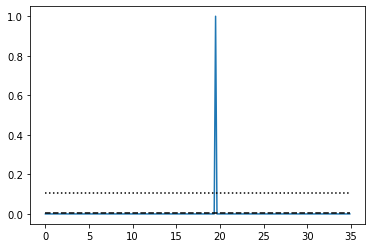

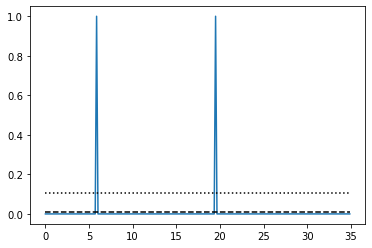

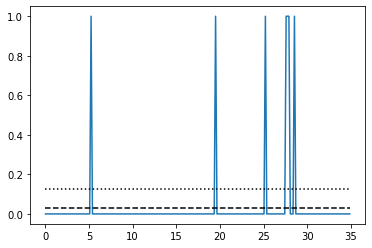

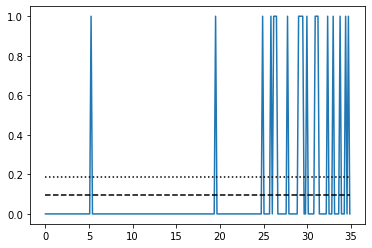

In [ ]:
# With 1&2um: measure major source size reductions
# With 10um: measure major source size increase

import numpy as np
import matplotlib.pyplot as plt
import analyze_timedep_functions as atf

# Chose wavelength
# Chose to check events where the source is smaller (reduced) or larger (increased)

#obscuration_type = 'reduced'
#wavelength = '01'
#wavelength = '02'
#rlimit = 0.75
#rlimit = 0.5

#obscuration_type = 'increased'
#wavelength = '10'
#rlimit = 1

#modelname = 'st28gm06n052_timedep'
#modelname = 'st28gm06n074'
modelname = 'st28gm06n075'

# Set path
path_starradi = f'../r3dresults/{modelname}_nodust/source_radius_{wavelength}um.dat'
path_sourceradi = f'../r3dresults/{modelname}_nospikes/source_radius_{wavelength}um.dat'

# Load snapshot times
phases = np.loadtxt(f'../r3dresults/{modelname}_nospikes/snapshot_yr.dat')[:,0]
snapshot_times = np.loadtxt(f'../r3dresults/{modelname}_nospikes/snapshot_yr.dat')[:,1]
Nphases = len(snapshot_times)

# List angles
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]

# Load stellar data
# each column is an angle
tempdata = np.loadtxt(path_starradi)
star_radii_average = tempdata[:,1]
star_radii_angles = tempdata[:,2:]


# Load dust+star data
tempdata = np.loadtxt(path_sourceradi)
source_radii_average = tempdata[:,1]
source_radii_angles = tempdata[:,2:]

# Loop through all phases and angles
# check source is XX times stellar source at same phase

for nangle,angle in enumerate(angles):
    dustevents = np.zeros(Nphases)

    # Extract events
    for nphase in range(Nphases):
        
        if obscuration_type == 'reduced':
            if source_radii_angles[nphase,nangle] <=  star_radii_angles[nphase,nangle]*rlimit:
                dustevents[nphase] = 1

        if obscuration_type == 'increased':
            if source_radii_angles[nphase,nangle] >= star_radii_angles[nphase,nangle]*rlimit:
                dustevents[nphase] = 1

    # Print FFT-data
    print(angle)
    # Extract periodicity of dustevents
    periods = atf.compute_period(
        signal=source_radii_angles[:,nangle],
        timeaxis=snapshot_times,
        plot_spec='y'
    )
    print(f'  FFT: {periods}')
    # Check if there are events:
    if np.sum(dustevents) != 0:
        # Extract statistics of dust events and plot events
        atf.extract_events(
            eventdata=dustevents,
            timerange=snapshot_times,
        )
    else:
        # Print output
        print(f'  N/A\n')





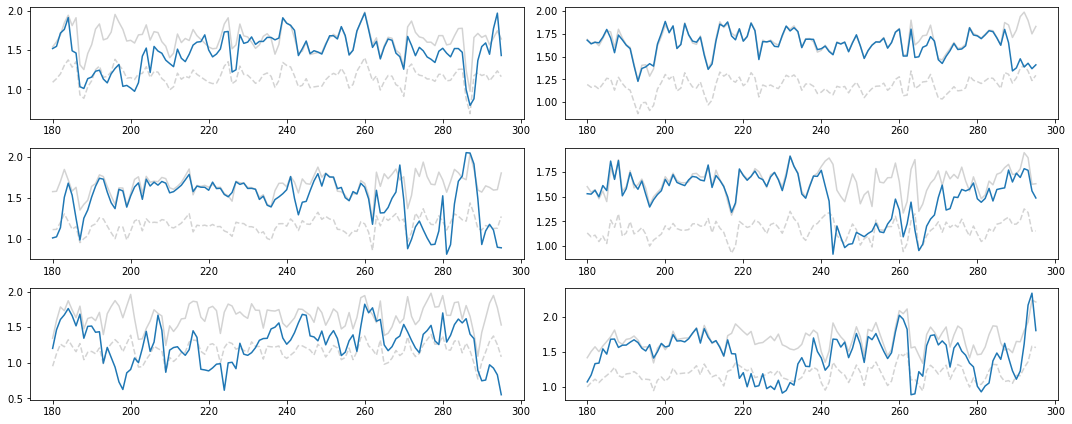

In [33]:
# Plot (For paper) difference in size between Rsource and Rstar
# Negative for obscuration
# Positive for increase

import numpy as np
import matplotlib.pyplot as plt

# Chose wavelength
# Chose to check events where the source is smaller (reduced) or larger (increased)
obscuration_type = 'reduced'
wavelength = '01'
#wavelength = '02'

#obscuration_type = 'increased'
#wavelength = '10'


# Set path
path_starradi = '../r3dresults/st28gm06n052_timedep_nodust/source_radius_01um.dat'
path_sourceradi = f'../r3dresults/st28gm06n052_timedep_nospikes/source_radius_{wavelength}um.dat'

# Load snapshot-times

# TODO


# Load stellar data
# each column is an angle
# NOTE included temporary to only use a subset of phases from starradi
tempdata = np.loadtxt(path_starradi)
star_radii = tempdata[:,2:]
phases = tempdata[:,0]

# Save number of phases and angles
Nphase = star_radii.shape[0]
Nangle = star_radii.shape[1]


# Load dust+star data
tempdata = np.loadtxt(path_sourceradi)
indexincludedphases = []
for phase in phases:
    # Extract phases from Rsource that exist in nodust NOTE temporary
    indexincludedphases.append(np.argwhere(tempdata[:,0] == phase)[0][0])
source_radii = tempdata[indexincludedphases,2:]

# Loop through all phases and angles
# Save difference in radius in this array
diff_radii = np.zeros(star_radii.shape)
half_star_radii = np.zeros(star_radii.shape)
sizelimit = np.sqrt(2)

for nangle in range(Nangle):
    for nphase in range(Nphase):
        diff_radii[nphase,nangle] = source_radii[nphase,nangle]
        if obscuration_type == 'reduced':
            half_star_radii[nphase,nangle] = star_radii[nphase,nangle]/sizelimit
        if obscuration_type == 'increased':
            half_star_radii[nphase,nangle] = star_radii[nphase,nangle]*sizelimit





fig, ax = plt.subplots(
    int(Nangle/2),2, 
    figsize = (15,6),
)

for nangle in range(Nangle):
    if nangle < 3:
        imind1 = nangle
        imind2 = 0
    else:
        imind1 = nangle-3
        imind2 = 1

    ax[imind1][imind2].plot(phases,star_radii[:,nangle],'lightgrey')
    ax[imind1][imind2].plot(phases,half_star_radii[:,nangle],linestyle='--',color='lightgrey')
    ax[imind1][imind2].plot(phases,diff_radii[:,nangle])

fig.tight_layout()    



# Compare with large sphere

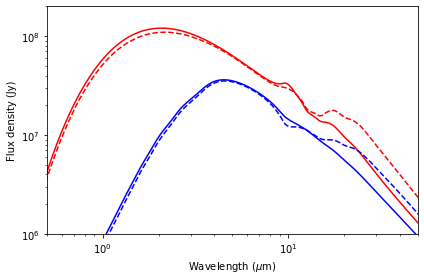

In [9]:
# Plot SEDs of each preliminary variant
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt

# No extinction
wavelength, sednormal = a3d.load_spectrum(
    path = '../r3dresults/st28gm06n052_largesphere/199_i090_phi270/spectrum_i090_phi270.out'
)
wavelength, sedlarge = a3d.load_spectrum(
    path = '../r3dresults/st28gm06n052_largesphere/199_i090_phi270/spectrum_199_largesphere.out'
)
plt.plot(wavelength,sednormal,'r-')
plt.plot(wavelength,sedlarge,'r--')
# Utan kraftig extinction från början blir det inte stor skillnad på
# korta våglängder men på längre så ser jag att 10um-featuren blir
# svagare medans på >20um är det maffig stoftemission

# With extinction
wavelength, sednormal = a3d.load_spectrum(
    path = '../r3dresults/st28gm06n052_largesphere/225_i090_phi090/spectrum_i090_phi090.out'
)
wavelength, sedlarge = a3d.load_spectrum(
    path = '../r3dresults/st28gm06n052_largesphere/225_i090_phi090/spectrum_225_largesphere.out'
)
plt.plot(wavelength,sednormal,'b-')
plt.plot(wavelength,sedlarge,'b--')
# Inte stor skillnad på korta våglängder här heller, däremot mer Si
# absorption vid 10um och kraftig emission på >20um.


plt.xscale('log')
plt.yscale('log')
plt.xlim([0.5,50])
plt.ylim([1e6,2e8])
plt.ylabel('Flux density (Jy)')
plt.xlabel(r'Wavelength ($\mu$m)')
plt.tight_layout()
plt.savefig('../r3dresults/st28gm06n052_largesphere/compare_sed.pdf', dpi=300)
